# CSC478:Final Project:Customer Churn--Angelene Arito & Kumar Mitra

Import packages

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.cross_validation import KFold
from sklearn import feature_selection
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_absolute_error

C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Import the dataset

In [2]:
churn = pd.read_csv("C:/Users/Angelene/Documents/DePaul/CSC478/Final Project/Churn_Modelling.csv", index_col=0)
churn

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


Drop "Surname" and "CustomerID" from the dataset - they do not add value

In [3]:
churn.drop('Surname', axis=1, inplace=True)
churn.drop('CustomerId', axis=1, inplace=True)

In [4]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The dataset did not appear to have any missing values, but wanted to check instances for each variable in case

In [5]:
churn[churn.CreditScore.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,


In [6]:
churn[churn.Geography.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,


In [7]:
churn[churn.Gender.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,


In [8]:
churn[churn.Age.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,


In [9]:
churn[churn.Tenure.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,


In [10]:
churn[churn.Balance.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,


In [11]:
churn[churn.NumOfProducts.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,


In [12]:
churn[churn.HasCrCard.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,


In [13]:
churn[churn.IsActiveMember.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,


In [14]:
churn[churn.EstimatedSalary.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,


In [15]:
churn[churn.Exited.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,


Pull high level stats about all variables in the dataset

In [16]:
churn.describe(include="all")

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


Calculate correlations

In [17]:
churn.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Create histograms for numeric variables and bar graphs for categorical variables to observe variable distributions

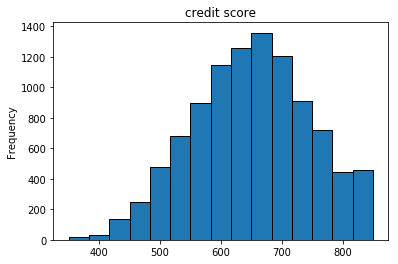

In [134]:
churn["CreditScore"].plot(kind="hist", bins=15, title="credit score")
plt.rcParams["patch.force_edgecolor"] = True

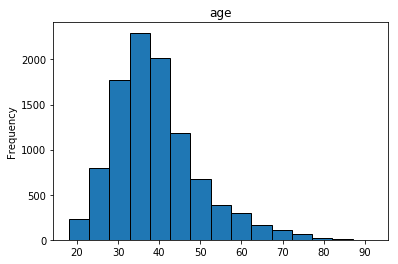

In [19]:
churn["Age"].plot(kind="hist", bins=15, title="age")
plt.rcParams["patch.force_edgecolor"] = True

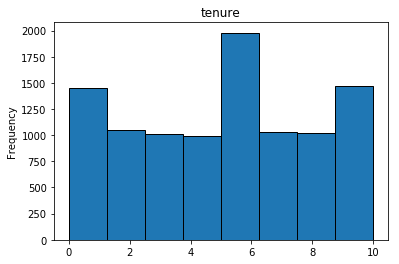

In [20]:
churn["Tenure"].plot(kind="hist", bins=8, title="tenure")
plt.rcParams["patch.force_edgecolor"] = True

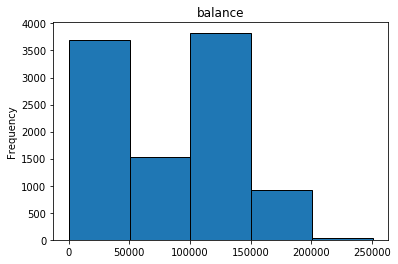

In [21]:
churn["Balance"].plot(kind="hist", bins=5, title="balance")
plt.rcParams["patch.force_edgecolor"] = True

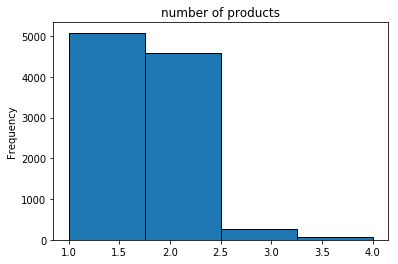

In [22]:
churn["NumOfProducts"].plot(kind="hist", bins=4, title="number of products")
plt.rcParams["patch.force_edgecolor"] = True

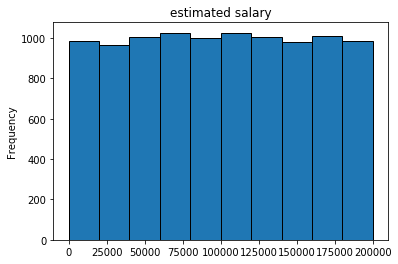

In [23]:
churn["EstimatedSalary"].plot(kind="hist", bins=10, title="estimated salary")
plt.rcParams["patch.force_edgecolor"] = True

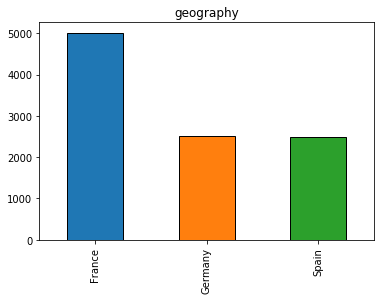

In [24]:
churn["Geography"].value_counts().plot(kind="bar", title="geography")

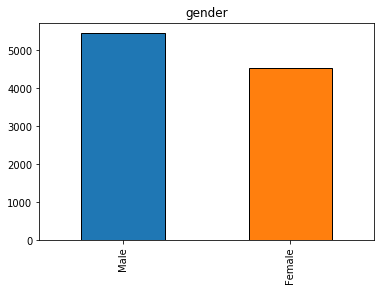

In [25]:
churn["Gender"].value_counts().plot(kind="bar", title="gender")

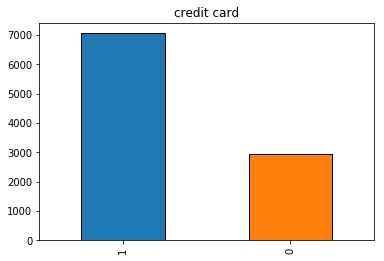

In [26]:
churn["HasCrCard"].value_counts().plot(kind="bar", title="credit card")

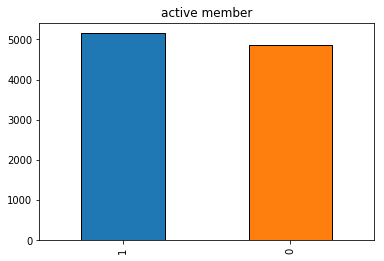

In [27]:
churn["IsActiveMember"].value_counts().plot(kind="bar", title="active member")

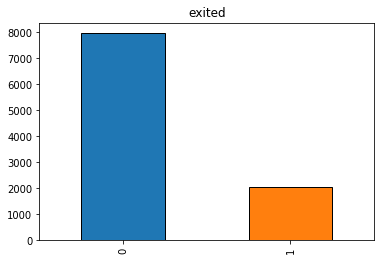

In [28]:
churn["Exited"].value_counts().plot(kind="bar", title="exited")

Create dummy variables for categorical variables in the dataset

In [29]:
churn_dum = pd.get_dummies(churn)
churn_dum.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
4,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


Rerun correlations

In [30]:
churn_dum.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780,0.002857,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685,0.027544,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868,-0.014733,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892,-0.012087,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039,0.021859,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480,-0.005766,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732,-0.022544,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482,0.008112,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667,0.106512,-0.106512
Geography_France,-0.008928,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,-0.104955,1.000000,-0.580359,-0.575418,-0.006772,0.006772


Perform min-max normalization on the data

In [31]:
from sklearn import preprocessing

In [32]:
min_max_scaler = preprocessing.MinMaxScaler().fit(churn_dum)
churn_norm = min_max_scaler.transform(churn_dum)

In [33]:
np.set_printoptions(precision=2, linewidth=150, suppress=True)

In [34]:
churn_norm

array([[0.54, 0.32, 0.2 , ..., 0.  , 1.  , 0.  ],
       [0.52, 0.31, 0.1 , ..., 1.  , 1.  , 0.  ],
       [0.3 , 0.32, 0.8 , ..., 0.  , 1.  , 0.  ],
       ...,
       [0.72, 0.24, 0.7 , ..., 0.  , 1.  , 0.  ],
       [0.84, 0.32, 0.3 , ..., 0.  , 0.  , 1.  ],
       [0.88, 0.14, 0.4 , ..., 0.  , 1.  , 0.  ]])

First isolate credit score as target attribute

In [35]:
c_score = churn_norm[:, 0]
churn_norm_cscore = np.delete(churn_norm, [0], axis=1)
c_score

array([0.54, 0.52, 0.3 , ..., 0.72, 0.84, 0.88])

In [36]:
churn_norm_cscore

array([[0.32, 0.2 , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.31, 0.1 , 0.33, ..., 1.  , 1.  , 0.  ],
       [0.32, 0.8 , 0.64, ..., 0.  , 1.  , 0.  ],
       ...,
       [0.24, 0.7 , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.32, 0.3 , 0.3 , ..., 0.  , 0.  , 1.  ],
       [0.14, 0.4 , 0.52, ..., 0.  , 1.  , 0.  ]])

Split train-test 80-20 for Credit Score

In [37]:
from sklearn.cross_validation import train_test_split
churn_train, churn_test, churn_target_train, churn_target_test = train_test_split(churn_norm_cscore, c_score, test_size=0.2, 
                                                                              random_state=33)

Perform standard linear regression

In [38]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [39]:
x = np.array(churn_norm_cscore)
x = np.array([np.concatenate((v,[1])) for v in churn_norm_cscore])
x

array([[0.32, 0.2 , 0.  , ..., 1.  , 0.  , 1.  ],
       [0.31, 0.1 , 0.33, ..., 1.  , 0.  , 1.  ],
       [0.32, 0.8 , 0.64, ..., 1.  , 0.  , 1.  ],
       ...,
       [0.24, 0.7 , 0.  , ..., 1.  , 0.  , 1.  ],
       [0.32, 0.3 , 0.3 , ..., 0.  , 1.  , 1.  ],
       [0.14, 0.4 , 0.52, ..., 1.  , 0.  , 1.  ]])

In [40]:
w = standRegres(x,c_score)

In [41]:
y = np.array(c_score)
y

array([0.54, 0.52, 0.3 , ..., 0.72, 0.84, 0.88])

In [42]:
linreg = LinearRegression()
linreg.fit(x,c_score)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
print (linreg.predict(x[:10]))

[0.59 0.61 0.59 0.6  0.61 0.59 0.61 0.6  0.61 0.61]


In [44]:
p = linreg.predict(x)
err = abs(p-c_score)
print (err[:10])

[0.05 0.09 0.29 0.1  0.39 0.   0.34 0.55 0.31 0.06]


In [45]:
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))
print (rmse_train)

0.1931600586006927


In [46]:
print ('Regression Coefficients: \n', linreg.coef_)

('Regression Coefficients: \n', array([ 1.56e-03, -3.94e-06,  7.58e-03,  1.39e-02, -2.40e-03,  8.41e-03, -8.62e-04, -1.18e-02,  2.34e+10,  2.34e+10,  2.34e+10,  6.39e+12,  6.39e+12,
        0.00e+00]))


Plot the correlation between the predicted and actual values of the target attribute

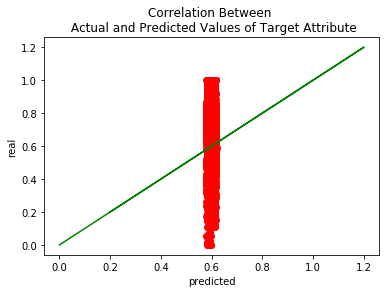

In [47]:
%matplotlib inline
pl.plot(p, c_score,'ro')
pl.plot([0,1.2,0.2],[0,1.2,0.2], 'g-')
plt.title('Correlation Between \n Actual and Predicted Values of Target Attribute')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

Compute RSME using 10-fold cross-validation

In [48]:
n = 10
kf = KFold(len(x), n_folds=n)
xval_err = 0
for train,test in kf:
    linreg.fit(x[train],c_score[train])
    p = linreg.predict(x[test])
    e = p-c_score[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
       
rmse_10cv = xval_err/n

Compare the cross-validation RMSE to the training RMSE

In [49]:
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

RMSE on training: 0.1932
RMSE on 10-fold CV: 0.1934


Feature Selection

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, 5)
rfe = rfe.fit(churn_norm_cscore, c_score)
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True False  True False  True  True False False False False]
[4 9 1 1 3 1 8 1 1 6 7 2 5]


Perform ridge regression

In [51]:
ridge = Ridge(fit_intercept=True)

In [52]:
ridge.fit(x,c_score)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Determine optimal alpha

In [53]:
def ridgereg(trainData, trainTarget, param, model, k):
    t_rmse = np.array([])
    cv_rmse = np.array([])
    print('Ridge Regression')
    print('alpha\t RMSE_train\t RMSE_5cv\n')
    
    for a in param:
        ridge = Ridge(alpha=a)
    
        ridge.fit(trainData,trainTarget)
        p = ridge.predict(trainData)
        err = p-trainTarget
        total_error = np.dot(err,err)
        rmse_train = np.sqrt(total_error/len(p))

        kf = KFold(len(trainData), n_folds=k)
        xval_err = 0
        for train, test in kf:
            ridge.fit(trainData[train], trainTarget[train])
            p = ridge.predict(trainData[test])
            err = p - trainTarget[test]
            xval_err += np.sqrt(np.dot(err,err)/len(trainData[test]))
        rmse_cv = xval_err/k
    
        t_rmse = np.append(t_rmse, [rmse_train])
        cv_rmse = np.append(cv_rmse, [rmse_cv])
        print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_cv))
        
    pl.plot(alpha, t_rmse, label='RMSE-Train')
    pl.plot(alpha, cv_rmse, label='RMSE_XVal')
    pl.legend( ('RMSE-Train', 'RMSE_XVal') )
    pl.ylabel('RMSE')
    pl.xlabel('Alpha')
    pl.show()

In [54]:
alpha = np.linspace(.001,1,100)

Ridge Regression
alpha	 RMSE_train	 RMSE_5cv

0.001	 0.1930		 0.1933
0.011	 0.1930		 0.1933
0.021	 0.1930		 0.1933
0.031	 0.1930		 0.1933
0.041	 0.1930		 0.1933
0.051	 0.1930		 0.1933
0.062	 0.1930		 0.1933
0.072	 0.1930		 0.1933
0.082	 0.1930		 0.1933
0.092	 0.1930		 0.1933
0.102	 0.1930		 0.1933
0.112	 0.1930		 0.1933
0.122	 0.1930		 0.1933
0.132	 0.1930		 0.1933
0.142	 0.1930		 0.1933
0.152	 0.1930		 0.1933
0.162	 0.1930		 0.1933
0.173	 0.1930		 0.1933
0.183	 0.1930		 0.1933
0.193	 0.1930		 0.1933
0.203	 0.1930		 0.1933
0.213	 0.1930		 0.1933
0.223	 0.1930		 0.1933
0.233	 0.1930		 0.1933
0.243	 0.1930		 0.1933
0.253	 0.1930		 0.1933
0.263	 0.1930		 0.1933
0.273	 0.1930		 0.1933
0.284	 0.1930		 0.1933
0.294	 0.1930		 0.1933
0.304	 0.1930		 0.1933
0.314	 0.1930		 0.1933
0.324	 0.1930		 0.1933
0.334	 0.1930		 0.1933
0.344	 0.1930		 0.1933
0.354	 0.1930		 0.1933
0.364	 0.1930		 0.1933
0.374	 0.1930		 0.1933
0.384	 0.1930		 0.1933
0.395	 0.1930		 0.1933
0.405	 0.1930		 0.1933
0.415	 0.19

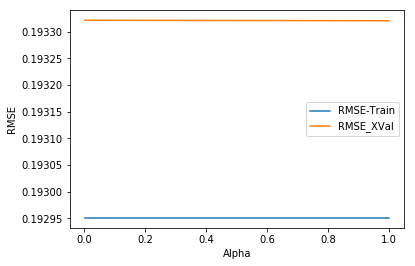

In [55]:
ridgereg(churn_train, churn_target_train, alpha, ridge, 5)

Run optimal alpha on test data with ridge

In [56]:
def ridgeRegres(xArr,yArr,lam=0.2):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    denom = xTx + np.eye(np.shape(xMat)[1])*lam
    if np.linalg.det(denom) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = denom.I * (xMat.T*yMat)
    return ws

Print the RidgeReg Coefficients

In [57]:
w_ridge = ridgeRegres(churn_test,churn_target_test,0.99)
print (w_ridge)

[[-0.02]
 [-0.  ]
 [ 0.04]
 [ 0.03]
 [-0.01]
 [ 0.01]
 [ 0.03]
 [ 0.01]
 [ 0.23]
 [ 0.23]
 [ 0.24]
 [ 0.35]
 [ 0.35]]


Determine optimal alpha

In [58]:
def lassoreg(trainData, trainTarget, param, model, k):
    t_rmse = np.array([])
    cv_rmse = np.array([])
    print('Lasso Regression')
    print('alpha\t RMSE_train\t RMSE_5cv\n')
    
    for a in param:
        lasso = Lasso(alpha=a)
    
        lasso.fit(trainData,trainTarget)
        p = lasso.predict(trainData)
        err = p-trainTarget
        total_error = np.dot(err,err)
        rmse_train = np.sqrt(total_error/len(p))

        kf = KFold(len(trainData), n_folds=k)
        xval_err = 0
        for train, test in kf:
            lasso.fit(trainData[train], trainTarget[train])
            p = lasso.predict(trainData[test])
            err = p - trainTarget[test]
            xval_err += np.sqrt(np.dot(err,err)/len(trainData[test]))
        rmse_cv = xval_err/k
    
        t_rmse = np.append(t_rmse, [rmse_train])
        cv_rmse = np.append(cv_rmse, [rmse_cv])
        print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_cv))
        
    pl.plot(alpha, t_rmse, label='RMSE-Train')
    pl.plot(alpha, cv_rmse, label='RMSE_XVal')
    pl.legend( ('RMSE-Train', 'RMSE_XVal') )
    pl.ylabel('RMSE')
    pl.xlabel('Alpha')
    pl.show()

In [59]:
lasso = Lasso(fit_intercept=True)

In [60]:
lasso.fit(x,c_score)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [61]:
alpha2 = np.linspace(.001,1,100)

Lasso Regression
alpha	 RMSE_train	 RMSE_5cv

0.001	 0.1930		 0.1931
0.011	 0.1932		 0.1932
0.021	 0.1932		 0.1932
0.031	 0.1932		 0.1932
0.041	 0.1932		 0.1932
0.051	 0.1932		 0.1932
0.062	 0.1932		 0.1932
0.072	 0.1932		 0.1932
0.082	 0.1932		 0.1932
0.092	 0.1932		 0.1932
0.102	 0.1932		 0.1932
0.112	 0.1932		 0.1932
0.122	 0.1932		 0.1932
0.132	 0.1932		 0.1932
0.142	 0.1932		 0.1932
0.152	 0.1932		 0.1932
0.162	 0.1932		 0.1932
0.173	 0.1932		 0.1932
0.183	 0.1932		 0.1932
0.193	 0.1932		 0.1932
0.203	 0.1932		 0.1932
0.213	 0.1932		 0.1932
0.223	 0.1932		 0.1932
0.233	 0.1932		 0.1932
0.243	 0.1932		 0.1932
0.253	 0.1932		 0.1932
0.263	 0.1932		 0.1932
0.273	 0.1932		 0.1932
0.284	 0.1932		 0.1932
0.294	 0.1932		 0.1932
0.304	 0.1932		 0.1932
0.314	 0.1932		 0.1932
0.324	 0.1932		 0.1932
0.334	 0.1932		 0.1932
0.344	 0.1932		 0.1932
0.354	 0.1932		 0.1932
0.364	 0.1932		 0.1932
0.374	 0.1932		 0.1932
0.384	 0.1932		 0.1932
0.395	 0.1932		 0.1932
0.405	 0.1932		 0.1932
0.415	 0.19

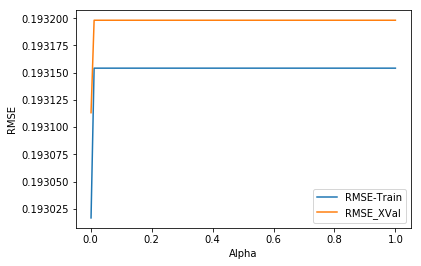

In [62]:
lassoreg(churn_train, churn_target_train, alpha2, ridge, 5)

Run optimal alpha on test data with lasso

In [63]:
def lassoRegres(xArr,yArr,lam=0.2):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    denom = xTx + np.eye(np.shape(xMat)[1])*lam
    if np.linalg.det(denom) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = denom.I * (xMat.T*yMat)
    return ws

Print the LassoReg Coefficients

In [64]:
w_lasso = lassoRegres(churn_test,churn_target_test,0.005)
print (w_lasso)

[[-0.02]
 [-0.  ]
 [ 0.03]
 [ 0.03]
 [-0.01]
 [ 0.01]
 [ 0.03]
 [ 0.01]
 [ 0.23]
 [ 0.23]
 [ 0.24]
 [ 0.35]
 [ 0.35]]


Perform GridSearch for SGD

In [65]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

churn_train, churn_test, churn_target_train, churn_target_test = train_test_split(churn_norm_cscore, c_score, test_size=0.2, 
                                                                              random_state=33)

# Performing the GridSearchCV first
sgdreg = SGDRegressor()

parameters  = {'penalty': ['l1', 'l2'],'alpha': np.linspace(0.0001, 100, 400)}
gs = GridSearchCV(sgdreg, parameters, verbose=2, cv=5)

gs.fit(churn_train, churn_target_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[CV] penalty=l1, alpha=0.0001 ........................................


C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................... penalty=l1, alpha=0.0001 -   0.0s
[CV] penalty=l1, alpha=0.0001 ........................................
[CV] ............................... penalty=l1, alpha=0.0001 -   0.0s
[CV] penalty=l1, alpha=0.0001 ........................................
[CV] ............................... penalty=l1, alpha=0.0001 -   0.0s
[CV] penalty=l1, alpha=0.0001 ........................................
[CV] ............................... penalty=l1, alpha=0.0001 -   0.0s
[CV] penalty=l1, alpha=0.0001 ........................................
[CV] ............................... penalty=l1, alpha=0.0001 -   0.0s
[CV] penalty=l2, alpha=0.0001 ........................................
[CV] ............................... penalty=l2, alpha=0.0001 -   0.0s
[CV] penalty=l2, alpha=0.0001 ........................................
[CV] ............................... penalty=l2, alpha=0.0001 -   0.0s
[CV] penalty=l2, alpha=0.0001 ........................................
[CV] .

[CV] ................... penalty=l1, alpha=1.5038578947368422 -   0.0s
[CV] penalty=l1, alpha=1.5038578947368422 ............................
[CV] ................... penalty=l1, alpha=1.5038578947368422 -   0.0s
[CV] penalty=l1, alpha=1.5038578947368422 ............................
[CV] ................... penalty=l1, alpha=1.5038578947368422 -   0.0s
[CV] penalty=l1, alpha=1.5038578947368422 ............................
[CV] ................... penalty=l1, alpha=1.5038578947368422 -   0.0s
[CV] penalty=l2, alpha=1.5038578947368422 ............................
[CV] ................... penalty=l2, alpha=1.5038578947368422 -   0.0s
[CV] penalty=l2, alpha=1.5038578947368422 ............................
[CV] ................... penalty=l2, alpha=1.5038578947368422 -   0.0s
[CV] penalty=l2, alpha=1.5038578947368422 ............................
[CV] ................... penalty=l2, alpha=1.5038578947368422 -   0.0s
[CV] penalty=l2, alpha=1.5038578947368422 ............................
[CV] .

[CV] .................... penalty=l2, alpha=2.756989473684211 -   0.0s
[CV] penalty=l1, alpha=3.0076157894736846 ............................
[CV] ................... penalty=l1, alpha=3.0076157894736846 -   0.0s
[CV] penalty=l1, alpha=3.0076157894736846 ............................
[CV] ................... penalty=l1, alpha=3.0076157894736846 -   0.0s
[CV] penalty=l1, alpha=3.0076157894736846 ............................
[CV] ................... penalty=l1, alpha=3.0076157894736846 -   0.0s
[CV] penalty=l1, alpha=3.0076157894736846 ............................
[CV] ................... penalty=l1, alpha=3.0076157894736846 -   0.0s
[CV] penalty=l1, alpha=3.0076157894736846 ............................
[CV] ................... penalty=l1, alpha=3.0076157894736846 -   0.0s
[CV] penalty=l2, alpha=3.0076157894736846 ............................
[CV] ................... penalty=l2, alpha=3.0076157894736846 -   0.0s
[CV] penalty=l2, alpha=3.0076157894736846 ............................
[CV] .

[CV] penalty=l2, alpha=4.511373684210526 .............................
[CV] .................... penalty=l2, alpha=4.511373684210526 -   0.0s
[CV] penalty=l2, alpha=4.511373684210526 .............................
[CV] .................... penalty=l2, alpha=4.511373684210526 -   0.0s
[CV] penalty=l1, alpha=4.7620000000000005 ............................
[CV] ................... penalty=l1, alpha=4.7620000000000005 -   0.0s
[CV] penalty=l1, alpha=4.7620000000000005 ............................
[CV] ................... penalty=l1, alpha=4.7620000000000005 -   0.0s
[CV] penalty=l1, alpha=4.7620000000000005 ............................
[CV] ................... penalty=l1, alpha=4.7620000000000005 -   0.0s
[CV] penalty=l1, alpha=4.7620000000000005 ............................
[CV] ................... penalty=l1, alpha=4.7620000000000005 -   0.0s
[CV] penalty=l1, alpha=4.7620000000000005 ............................
[CV] ................... penalty=l1, alpha=4.7620000000000005 -   0.0s
[CV] p

[CV] .................... penalty=l2, alpha=6.265757894736842 -   0.0s
[CV] penalty=l2, alpha=6.265757894736842 .............................
[CV] .................... penalty=l2, alpha=6.265757894736842 -   0.0s
[CV] penalty=l2, alpha=6.265757894736842 .............................
[CV] .................... penalty=l2, alpha=6.265757894736842 -   0.0s
[CV] penalty=l2, alpha=6.265757894736842 .............................
[CV] .................... penalty=l2, alpha=6.265757894736842 -   0.0s
[CV] penalty=l2, alpha=6.265757894736842 .............................
[CV] .................... penalty=l2, alpha=6.265757894736842 -   0.0s
[CV] penalty=l1, alpha=6.516384210526316 .............................
[CV] .................... penalty=l1, alpha=6.516384210526316 -   0.0s
[CV] penalty=l1, alpha=6.516384210526316 .............................
[CV] .................... penalty=l1, alpha=6.516384210526316 -   0.0s
[CV] penalty=l1, alpha=6.516384210526316 .............................
[CV] .

[CV] .................... penalty=l1, alpha=8.020142105263158 -   0.0s
[CV] penalty=l1, alpha=8.020142105263158 .............................
[CV] .................... penalty=l1, alpha=8.020142105263158 -   0.0s
[CV] penalty=l2, alpha=8.020142105263158 .............................
[CV] .................... penalty=l2, alpha=8.020142105263158 -   0.0s
[CV] penalty=l2, alpha=8.020142105263158 .............................
[CV] .................... penalty=l2, alpha=8.020142105263158 -   0.0s
[CV] penalty=l2, alpha=8.020142105263158 .............................
[CV] .................... penalty=l2, alpha=8.020142105263158 -   0.0s
[CV] penalty=l2, alpha=8.020142105263158 .............................
[CV] .................... penalty=l2, alpha=8.020142105263158 -   0.0s
[CV] penalty=l2, alpha=8.020142105263158 .............................
[CV] .................... penalty=l2, alpha=8.020142105263158 -   0.0s
[CV] penalty=l1, alpha=8.270768421052631 .............................
[CV] .

[CV] .................... penalty=l1, alpha=9.774526315789474 -   0.0s
[CV] penalty=l1, alpha=9.774526315789474 .............................
[CV] .................... penalty=l1, alpha=9.774526315789474 -   0.0s
[CV] penalty=l2, alpha=9.774526315789474 .............................
[CV] .................... penalty=l2, alpha=9.774526315789474 -   0.0s
[CV] penalty=l2, alpha=9.774526315789474 .............................
[CV] .................... penalty=l2, alpha=9.774526315789474 -   0.0s
[CV] penalty=l2, alpha=9.774526315789474 .............................
[CV] .................... penalty=l2, alpha=9.774526315789474 -   0.0s
[CV] penalty=l2, alpha=9.774526315789474 .............................
[CV] .................... penalty=l2, alpha=9.774526315789474 -   0.0s
[CV] penalty=l2, alpha=9.774526315789474 .............................
[CV] .................... penalty=l2, alpha=9.774526315789474 -   0.0s
[CV] penalty=l1, alpha=10.025152631578948 ............................
[CV] .

[CV] ................... penalty=l2, alpha=11.278284210526316 -   0.0s
[CV] penalty=l2, alpha=11.278284210526316 ............................
[CV] ................... penalty=l2, alpha=11.278284210526316 -   0.0s
[CV] penalty=l1, alpha=11.52891052631579 .............................
[CV] .................... penalty=l1, alpha=11.52891052631579 -   0.0s
[CV] penalty=l1, alpha=11.52891052631579 .............................
[CV] .................... penalty=l1, alpha=11.52891052631579 -   0.0s
[CV] penalty=l1, alpha=11.52891052631579 .............................
[CV] .................... penalty=l1, alpha=11.52891052631579 -   0.0s
[CV] penalty=l1, alpha=11.52891052631579 .............................
[CV] .................... penalty=l1, alpha=11.52891052631579 -   0.0s
[CV] penalty=l1, alpha=11.52891052631579 .............................
[CV] .................... penalty=l1, alpha=11.52891052631579 -   0.0s
[CV] penalty=l2, alpha=11.52891052631579 .............................
[CV] .

[CV] ................... penalty=l2, alpha=13.032668421052632 -   0.0s
[CV] penalty=l1, alpha=13.283294736842105 ............................
[CV] ................... penalty=l1, alpha=13.283294736842105 -   0.0s
[CV] penalty=l1, alpha=13.283294736842105 ............................
[CV] ................... penalty=l1, alpha=13.283294736842105 -   0.0s
[CV] penalty=l1, alpha=13.283294736842105 ............................
[CV] ................... penalty=l1, alpha=13.283294736842105 -   0.0s
[CV] penalty=l1, alpha=13.283294736842105 ............................
[CV] ................... penalty=l1, alpha=13.283294736842105 -   0.0s
[CV] penalty=l1, alpha=13.283294736842105 ............................
[CV] ................... penalty=l1, alpha=13.283294736842105 -   0.0s
[CV] penalty=l2, alpha=13.283294736842105 ............................
[CV] ................... penalty=l2, alpha=13.283294736842105 -   0.0s
[CV] penalty=l2, alpha=13.283294736842105 ............................
[CV] .

[CV] ................... penalty=l1, alpha=14.787052631578948 -   0.0s
[CV] penalty=l2, alpha=14.787052631578948 ............................
[CV] ................... penalty=l2, alpha=14.787052631578948 -   0.0s
[CV] penalty=l2, alpha=14.787052631578948 ............................
[CV] ................... penalty=l2, alpha=14.787052631578948 -   0.0s
[CV] penalty=l2, alpha=14.787052631578948 ............................
[CV] ................... penalty=l2, alpha=14.787052631578948 -   0.0s
[CV] penalty=l2, alpha=14.787052631578948 ............................
[CV] ................... penalty=l2, alpha=14.787052631578948 -   0.0s
[CV] penalty=l2, alpha=14.787052631578948 ............................
[CV] ................... penalty=l2, alpha=14.787052631578948 -   0.0s
[CV] penalty=l1, alpha=15.037678947368422 ............................
[CV] ................... penalty=l1, alpha=15.037678947368422 -   0.0s
[CV] penalty=l1, alpha=15.037678947368422 ............................
[CV] .

[CV] penalty=l2, alpha=16.29081052631579 .............................
[CV] .................... penalty=l2, alpha=16.29081052631579 -   0.0s
[CV] penalty=l2, alpha=16.29081052631579 .............................
[CV] .................... penalty=l2, alpha=16.29081052631579 -   0.0s
[CV] penalty=l2, alpha=16.29081052631579 .............................
[CV] .................... penalty=l2, alpha=16.29081052631579 -   0.0s
[CV] penalty=l2, alpha=16.29081052631579 .............................
[CV] .................... penalty=l2, alpha=16.29081052631579 -   0.0s
[CV] penalty=l1, alpha=16.541436842105263 ............................
[CV] ................... penalty=l1, alpha=16.541436842105263 -   0.0s
[CV] penalty=l1, alpha=16.541436842105263 ............................
[CV] ................... penalty=l1, alpha=16.541436842105263 -   0.0s
[CV] penalty=l1, alpha=16.541436842105263 ............................
[CV] ................... penalty=l1, alpha=16.541436842105263 -   0.0s
[CV] p

[CV] .................... penalty=l2, alpha=17.79456842105263 -   0.0s
[CV] penalty=l2, alpha=17.79456842105263 .............................
[CV] .................... penalty=l2, alpha=17.79456842105263 -   0.0s
[CV] penalty=l2, alpha=17.79456842105263 .............................
[CV] .................... penalty=l2, alpha=17.79456842105263 -   0.0s
[CV] penalty=l2, alpha=17.79456842105263 .............................
[CV] .................... penalty=l2, alpha=17.79456842105263 -   0.0s
[CV] penalty=l1, alpha=18.045194736842106 ............................
[CV] ................... penalty=l1, alpha=18.045194736842106 -   0.0s
[CV] penalty=l1, alpha=18.045194736842106 ............................
[CV] ................... penalty=l1, alpha=18.045194736842106 -   0.0s
[CV] penalty=l1, alpha=18.045194736842106 ............................
[CV] ................... penalty=l1, alpha=18.045194736842106 -   0.0s
[CV] penalty=l1, alpha=18.045194736842106 ............................
[CV] .

[CV] ................... penalty=l2, alpha=19.298326315789474 -   0.0s
[CV] penalty=l2, alpha=19.298326315789474 ............................
[CV] ................... penalty=l2, alpha=19.298326315789474 -   0.0s
[CV] penalty=l2, alpha=19.298326315789474 ............................
[CV] ................... penalty=l2, alpha=19.298326315789474 -   0.0s
[CV] penalty=l2, alpha=19.298326315789474 ............................
[CV] ................... penalty=l2, alpha=19.298326315789474 -   0.0s
[CV] penalty=l1, alpha=19.54895263157895 .............................
[CV] .................... penalty=l1, alpha=19.54895263157895 -   0.0s
[CV] penalty=l1, alpha=19.54895263157895 .............................
[CV] .................... penalty=l1, alpha=19.54895263157895 -   0.0s
[CV] penalty=l1, alpha=19.54895263157895 .............................
[CV] .................... penalty=l1, alpha=19.54895263157895 -   0.0s
[CV] penalty=l1, alpha=19.54895263157895 .............................
[CV] .

[CV] ................... penalty=l2, alpha=20.802084210526317 -   0.0s
[CV] penalty=l2, alpha=20.802084210526317 ............................
[CV] ................... penalty=l2, alpha=20.802084210526317 -   0.0s
[CV] penalty=l2, alpha=20.802084210526317 ............................
[CV] ................... penalty=l2, alpha=20.802084210526317 -   0.0s
[CV] penalty=l1, alpha=21.05271052631579 .............................
[CV] .................... penalty=l1, alpha=21.05271052631579 -   0.0s
[CV] penalty=l1, alpha=21.05271052631579 .............................
[CV] .................... penalty=l1, alpha=21.05271052631579 -   0.0s
[CV] penalty=l1, alpha=21.05271052631579 .............................
[CV] .................... penalty=l1, alpha=21.05271052631579 -   0.0s
[CV] penalty=l1, alpha=21.05271052631579 .............................
[CV] .................... penalty=l1, alpha=21.05271052631579 -   0.0s
[CV] penalty=l1, alpha=21.05271052631579 .............................
[CV] .

[CV] .................... penalty=l2, alpha=22.30584210526316 -   0.0s
[CV] penalty=l2, alpha=22.30584210526316 .............................
[CV] .................... penalty=l2, alpha=22.30584210526316 -   0.0s
[CV] penalty=l2, alpha=22.30584210526316 .............................
[CV] .................... penalty=l2, alpha=22.30584210526316 -   0.0s
[CV] penalty=l1, alpha=22.55646842105263 .............................
[CV] .................... penalty=l1, alpha=22.55646842105263 -   0.0s
[CV] penalty=l1, alpha=22.55646842105263 .............................
[CV] .................... penalty=l1, alpha=22.55646842105263 -   0.0s
[CV] penalty=l1, alpha=22.55646842105263 .............................
[CV] .................... penalty=l1, alpha=22.55646842105263 -   0.0s
[CV] penalty=l1, alpha=22.55646842105263 .............................
[CV] .................... penalty=l1, alpha=22.55646842105263 -   0.0s
[CV] penalty=l1, alpha=22.55646842105263 .............................
[CV] .

[CV] .............................. penalty=l2, alpha=23.8096 -   0.0s
[CV] penalty=l2, alpha=23.8096 .......................................
[CV] .............................. penalty=l2, alpha=23.8096 -   0.0s
[CV] penalty=l2, alpha=23.8096 .......................................
[CV] .............................. penalty=l2, alpha=23.8096 -   0.0s
[CV] penalty=l2, alpha=23.8096 .......................................
[CV] .............................. penalty=l2, alpha=23.8096 -   0.0s
[CV] penalty=l2, alpha=23.8096 .......................................
[CV] .............................. penalty=l2, alpha=23.8096 -   0.0s
[CV] penalty=l1, alpha=24.060226315789475 ............................
[CV] ................... penalty=l1, alpha=24.060226315789475 -   0.0s
[CV] penalty=l1, alpha=24.060226315789475 ............................
[CV] ................... penalty=l1, alpha=24.060226315789475 -   0.0s
[CV] penalty=l1, alpha=24.060226315789475 ............................
[CV] .

[CV] ................... penalty=l1, alpha=25.313357894736843 -   0.0s
[CV] penalty=l1, alpha=25.313357894736843 ............................
[CV] ................... penalty=l1, alpha=25.313357894736843 -   0.0s
[CV] penalty=l2, alpha=25.313357894736843 ............................
[CV] ................... penalty=l2, alpha=25.313357894736843 -   0.0s
[CV] penalty=l2, alpha=25.313357894736843 ............................
[CV] ................... penalty=l2, alpha=25.313357894736843 -   0.0s
[CV] penalty=l2, alpha=25.313357894736843 ............................
[CV] ................... penalty=l2, alpha=25.313357894736843 -   0.0s
[CV] penalty=l2, alpha=25.313357894736843 ............................
[CV] ................... penalty=l2, alpha=25.313357894736843 -   0.0s
[CV] penalty=l2, alpha=25.313357894736843 ............................
[CV] ................... penalty=l2, alpha=25.313357894736843 -   0.0s
[CV] penalty=l1, alpha=25.563984210526318 ............................
[CV] .

[CV] ................... penalty=l2, alpha=26.817115789473686 -   0.0s
[CV] penalty=l2, alpha=26.817115789473686 ............................
[CV] ................... penalty=l2, alpha=26.817115789473686 -   0.0s
[CV] penalty=l2, alpha=26.817115789473686 ............................
[CV] ................... penalty=l2, alpha=26.817115789473686 -   0.0s
[CV] penalty=l2, alpha=26.817115789473686 ............................
[CV] ................... penalty=l2, alpha=26.817115789473686 -   0.0s
[CV] penalty=l2, alpha=26.817115789473686 ............................
[CV] ................... penalty=l2, alpha=26.817115789473686 -   0.0s
[CV] penalty=l1, alpha=27.06774210526316 .............................
[CV] .................... penalty=l1, alpha=27.06774210526316 -   0.0s
[CV] penalty=l1, alpha=27.06774210526316 .............................
[CV] .................... penalty=l1, alpha=27.06774210526316 -   0.0s
[CV] penalty=l1, alpha=27.06774210526316 .............................
[CV] .

[CV] .............................. penalty=l1, alpha=28.5715 -   0.0s
[CV] penalty=l1, alpha=28.5715 .......................................
[CV] .............................. penalty=l1, alpha=28.5715 -   0.0s
[CV] penalty=l1, alpha=28.5715 .......................................
[CV] .............................. penalty=l1, alpha=28.5715 -   0.0s
[CV] penalty=l2, alpha=28.5715 .......................................
[CV] .............................. penalty=l2, alpha=28.5715 -   0.0s
[CV] penalty=l2, alpha=28.5715 .......................................
[CV] .............................. penalty=l2, alpha=28.5715 -   0.0s
[CV] penalty=l2, alpha=28.5715 .......................................
[CV] .............................. penalty=l2, alpha=28.5715 -   0.0s
[CV] penalty=l2, alpha=28.5715 .......................................
[CV] .............................. penalty=l2, alpha=28.5715 -   0.0s
[CV] penalty=l2, alpha=28.5715 .......................................
[CV] .

[CV] ................... penalty=l1, alpha=30.075257894736843 -   0.0s
[CV] penalty=l1, alpha=30.075257894736843 ............................
[CV] ................... penalty=l1, alpha=30.075257894736843 -   0.0s
[CV] penalty=l1, alpha=30.075257894736843 ............................
[CV] ................... penalty=l1, alpha=30.075257894736843 -   0.0s
[CV] penalty=l1, alpha=30.075257894736843 ............................
[CV] ................... penalty=l1, alpha=30.075257894736843 -   0.0s
[CV] penalty=l1, alpha=30.075257894736843 ............................
[CV] ................... penalty=l1, alpha=30.075257894736843 -   0.0s
[CV] penalty=l2, alpha=30.075257894736843 ............................
[CV] ................... penalty=l2, alpha=30.075257894736843 -   0.0s
[CV] penalty=l2, alpha=30.075257894736843 ............................
[CV] ................... penalty=l2, alpha=30.075257894736843 -   0.0s
[CV] penalty=l2, alpha=30.075257894736843 ............................
[CV] .

[CV] ................... penalty=l1, alpha=31.579015789473686 -   0.0s
[CV] penalty=l1, alpha=31.579015789473686 ............................
[CV] ................... penalty=l1, alpha=31.579015789473686 -   0.0s
[CV] penalty=l1, alpha=31.579015789473686 ............................
[CV] ................... penalty=l1, alpha=31.579015789473686 -   0.0s
[CV] penalty=l1, alpha=31.579015789473686 ............................
[CV] ................... penalty=l1, alpha=31.579015789473686 -   0.0s
[CV] penalty=l2, alpha=31.579015789473686 ............................
[CV] ................... penalty=l2, alpha=31.579015789473686 -   0.0s
[CV] penalty=l2, alpha=31.579015789473686 ............................
[CV] ................... penalty=l2, alpha=31.579015789473686 -   0.0s
[CV] penalty=l2, alpha=31.579015789473686 ............................
[CV] ................... penalty=l2, alpha=31.579015789473686 -   0.0s
[CV] penalty=l2, alpha=31.579015789473686 ............................
[CV] .

[CV] .................... penalty=l1, alpha=33.08277368421053 -   0.0s
[CV] penalty=l1, alpha=33.08277368421053 .............................
[CV] .................... penalty=l1, alpha=33.08277368421053 -   0.0s
[CV] penalty=l2, alpha=33.08277368421053 .............................
[CV] .................... penalty=l2, alpha=33.08277368421053 -   0.0s
[CV] penalty=l2, alpha=33.08277368421053 .............................
[CV] .................... penalty=l2, alpha=33.08277368421053 -   0.0s
[CV] penalty=l2, alpha=33.08277368421053 .............................
[CV] .................... penalty=l2, alpha=33.08277368421053 -   0.0s
[CV] penalty=l2, alpha=33.08277368421053 .............................
[CV] .................... penalty=l2, alpha=33.08277368421053 -   0.0s
[CV] penalty=l2, alpha=33.08277368421053 .............................
[CV] .................... penalty=l2, alpha=33.08277368421053 -   0.0s
[CV] penalty=l1, alpha=33.333400000000005 ............................
[CV] .

[CV] penalty=l1, alpha=34.58653157894737 .............................
[CV] .................... penalty=l1, alpha=34.58653157894737 -   0.0s
[CV] penalty=l1, alpha=34.58653157894737 .............................
[CV] .................... penalty=l1, alpha=34.58653157894737 -   0.0s
[CV] penalty=l1, alpha=34.58653157894737 .............................
[CV] .................... penalty=l1, alpha=34.58653157894737 -   0.0s
[CV] penalty=l2, alpha=34.58653157894737 .............................
[CV] .................... penalty=l2, alpha=34.58653157894737 -   0.0s
[CV] penalty=l2, alpha=34.58653157894737 .............................
[CV] .................... penalty=l2, alpha=34.58653157894737 -   0.0s
[CV] penalty=l2, alpha=34.58653157894737 .............................
[CV] .................... penalty=l2, alpha=34.58653157894737 -   0.0s
[CV] penalty=l2, alpha=34.58653157894737 .............................
[CV] .................... penalty=l2, alpha=34.58653157894737 -   0.0s
[CV] p

[CV] ................... penalty=l1, alpha=36.090289473684216 -   0.0s
[CV] penalty=l2, alpha=36.090289473684216 ............................
[CV] ................... penalty=l2, alpha=36.090289473684216 -   0.0s
[CV] penalty=l2, alpha=36.090289473684216 ............................
[CV] ................... penalty=l2, alpha=36.090289473684216 -   0.0s
[CV] penalty=l2, alpha=36.090289473684216 ............................
[CV] ................... penalty=l2, alpha=36.090289473684216 -   0.0s
[CV] penalty=l2, alpha=36.090289473684216 ............................
[CV] ................... penalty=l2, alpha=36.090289473684216 -   0.0s
[CV] penalty=l2, alpha=36.090289473684216 ............................
[CV] ................... penalty=l2, alpha=36.090289473684216 -   0.0s
[CV] penalty=l1, alpha=36.34091578947369 .............................
[CV] .................... penalty=l1, alpha=36.34091578947369 -   0.0s
[CV] penalty=l1, alpha=36.34091578947369 .............................
[CV] .

[CV] penalty=l2, alpha=37.59404736842106 .............................
[CV] .................... penalty=l2, alpha=37.59404736842106 -   0.0s
[CV] penalty=l2, alpha=37.59404736842106 .............................
[CV] .................... penalty=l2, alpha=37.59404736842106 -   0.0s
[CV] penalty=l2, alpha=37.59404736842106 .............................
[CV] .................... penalty=l2, alpha=37.59404736842106 -   0.0s
[CV] penalty=l2, alpha=37.59404736842106 .............................
[CV] .................... penalty=l2, alpha=37.59404736842106 -   0.0s
[CV] penalty=l1, alpha=37.844673684210534 ............................
[CV] ................... penalty=l1, alpha=37.844673684210534 -   0.0s
[CV] penalty=l1, alpha=37.844673684210534 ............................
[CV] ................... penalty=l1, alpha=37.844673684210534 -   0.0s
[CV] penalty=l1, alpha=37.844673684210534 ............................
[CV] ................... penalty=l1, alpha=37.844673684210534 -   0.0s
[CV] p

[CV] penalty=l1, alpha=39.34843157894738 .............................
[CV] .................... penalty=l1, alpha=39.34843157894738 -   0.0s
[CV] penalty=l1, alpha=39.34843157894738 .............................
[CV] .................... penalty=l1, alpha=39.34843157894738 -   0.0s
[CV] penalty=l1, alpha=39.34843157894738 .............................
[CV] .................... penalty=l1, alpha=39.34843157894738 -   0.0s
[CV] penalty=l1, alpha=39.34843157894738 .............................
[CV] .................... penalty=l1, alpha=39.34843157894738 -   0.0s
[CV] penalty=l1, alpha=39.34843157894738 .............................
[CV] .................... penalty=l1, alpha=39.34843157894738 -   0.0s
[CV] penalty=l2, alpha=39.34843157894738 .............................
[CV] .................... penalty=l2, alpha=39.34843157894738 -   0.0s
[CV] penalty=l2, alpha=39.34843157894738 .............................
[CV] .................... penalty=l2, alpha=39.34843157894738 -   0.0s
[CV] p

[CV] penalty=l1, alpha=40.85218947368421 .............................
[CV] .................... penalty=l1, alpha=40.85218947368421 -   0.0s
[CV] penalty=l1, alpha=40.85218947368421 .............................
[CV] .................... penalty=l1, alpha=40.85218947368421 -   0.0s
[CV] penalty=l2, alpha=40.85218947368421 .............................
[CV] .................... penalty=l2, alpha=40.85218947368421 -   0.0s
[CV] penalty=l2, alpha=40.85218947368421 .............................
[CV] .................... penalty=l2, alpha=40.85218947368421 -   0.0s
[CV] penalty=l2, alpha=40.85218947368421 .............................
[CV] .................... penalty=l2, alpha=40.85218947368421 -   0.0s
[CV] penalty=l2, alpha=40.85218947368421 .............................
[CV] .................... penalty=l2, alpha=40.85218947368421 -   0.0s
[CV] penalty=l2, alpha=40.85218947368421 .............................
[CV] .................... penalty=l2, alpha=40.85218947368421 -   0.0s
[CV] p

[CV] penalty=l1, alpha=42.60657368421053 .............................
[CV] .................... penalty=l1, alpha=42.60657368421053 -   0.0s
[CV] penalty=l1, alpha=42.60657368421053 .............................
[CV] .................... penalty=l1, alpha=42.60657368421053 -   0.0s
[CV] penalty=l1, alpha=42.60657368421053 .............................
[CV] .................... penalty=l1, alpha=42.60657368421053 -   0.0s
[CV] penalty=l1, alpha=42.60657368421053 .............................
[CV] .................... penalty=l1, alpha=42.60657368421053 -   0.0s
[CV] penalty=l1, alpha=42.60657368421053 .............................
[CV] .................... penalty=l1, alpha=42.60657368421053 -   0.0s
[CV] penalty=l2, alpha=42.60657368421053 .............................
[CV] .................... penalty=l2, alpha=42.60657368421053 -   0.0s
[CV] penalty=l2, alpha=42.60657368421053 .............................
[CV] .................... penalty=l2, alpha=42.60657368421053 -   0.0s
[CV] p

[CV] ................... penalty=l1, alpha=44.110331578947374 -   0.0s
[CV] penalty=l1, alpha=44.110331578947374 ............................
[CV] ................... penalty=l1, alpha=44.110331578947374 -   0.0s
[CV] penalty=l1, alpha=44.110331578947374 ............................
[CV] ................... penalty=l1, alpha=44.110331578947374 -   0.0s
[CV] penalty=l2, alpha=44.110331578947374 ............................
[CV] ................... penalty=l2, alpha=44.110331578947374 -   0.0s
[CV] penalty=l2, alpha=44.110331578947374 ............................
[CV] ................... penalty=l2, alpha=44.110331578947374 -   0.0s
[CV] penalty=l2, alpha=44.110331578947374 ............................
[CV] ................... penalty=l2, alpha=44.110331578947374 -   0.0s
[CV] penalty=l2, alpha=44.110331578947374 ............................
[CV] ................... penalty=l2, alpha=44.110331578947374 -   0.0s
[CV] penalty=l2, alpha=44.110331578947374 ............................
[CV] .

[CV] .................... penalty=l1, alpha=45.61408947368422 -   0.0s
[CV] penalty=l1, alpha=45.61408947368422 .............................
[CV] .................... penalty=l1, alpha=45.61408947368422 -   0.0s
[CV] penalty=l2, alpha=45.61408947368422 .............................
[CV] .................... penalty=l2, alpha=45.61408947368422 -   0.0s
[CV] penalty=l2, alpha=45.61408947368422 .............................
[CV] .................... penalty=l2, alpha=45.61408947368422 -   0.0s
[CV] penalty=l2, alpha=45.61408947368422 .............................
[CV] .................... penalty=l2, alpha=45.61408947368422 -   0.0s
[CV] penalty=l2, alpha=45.61408947368422 .............................
[CV] .................... penalty=l2, alpha=45.61408947368422 -   0.0s
[CV] penalty=l2, alpha=45.61408947368422 .............................
[CV] .................... penalty=l2, alpha=45.61408947368422 -   0.0s
[CV] penalty=l1, alpha=45.86471578947369 .............................
[CV] .

[CV] penalty=l1, alpha=47.11784736842106 .............................
[CV] .................... penalty=l1, alpha=47.11784736842106 -   0.0s
[CV] penalty=l1, alpha=47.11784736842106 .............................
[CV] .................... penalty=l1, alpha=47.11784736842106 -   0.0s
[CV] penalty=l1, alpha=47.11784736842106 .............................
[CV] .................... penalty=l1, alpha=47.11784736842106 -   0.0s
[CV] penalty=l2, alpha=47.11784736842106 .............................
[CV] .................... penalty=l2, alpha=47.11784736842106 -   0.0s
[CV] penalty=l2, alpha=47.11784736842106 .............................
[CV] .................... penalty=l2, alpha=47.11784736842106 -   0.0s
[CV] penalty=l2, alpha=47.11784736842106 .............................
[CV] .................... penalty=l2, alpha=47.11784736842106 -   0.0s
[CV] penalty=l2, alpha=47.11784736842106 .............................
[CV] .................... penalty=l2, alpha=47.11784736842106 -   0.0s
[CV] p

[CV] ..................... penalty=l1, alpha=48.6216052631579 -   0.0s
[CV] penalty=l1, alpha=48.6216052631579 ..............................
[CV] ..................... penalty=l1, alpha=48.6216052631579 -   0.0s
[CV] penalty=l1, alpha=48.6216052631579 ..............................
[CV] ..................... penalty=l1, alpha=48.6216052631579 -   0.0s
[CV] penalty=l2, alpha=48.6216052631579 ..............................
[CV] ..................... penalty=l2, alpha=48.6216052631579 -   0.0s
[CV] penalty=l2, alpha=48.6216052631579 ..............................
[CV] ..................... penalty=l2, alpha=48.6216052631579 -   0.0s
[CV] penalty=l2, alpha=48.6216052631579 ..............................
[CV] ..................... penalty=l2, alpha=48.6216052631579 -   0.0s
[CV] penalty=l2, alpha=48.6216052631579 ..............................
[CV] ..................... penalty=l2, alpha=48.6216052631579 -   0.0s
[CV] penalty=l2, alpha=48.6216052631579 ..............................
[CV] .

[CV] .................... penalty=l2, alpha=50.12536315789474 -   0.0s
[CV] penalty=l2, alpha=50.12536315789474 .............................
[CV] .................... penalty=l2, alpha=50.12536315789474 -   0.0s
[CV] penalty=l1, alpha=50.375989473684214 ............................
[CV] ................... penalty=l1, alpha=50.375989473684214 -   0.0s
[CV] penalty=l1, alpha=50.375989473684214 ............................
[CV] ................... penalty=l1, alpha=50.375989473684214 -   0.0s
[CV] penalty=l1, alpha=50.375989473684214 ............................
[CV] ................... penalty=l1, alpha=50.375989473684214 -   0.0s
[CV] penalty=l1, alpha=50.375989473684214 ............................
[CV] ................... penalty=l1, alpha=50.375989473684214 -   0.0s
[CV] penalty=l1, alpha=50.375989473684214 ............................
[CV] ................... penalty=l1, alpha=50.375989473684214 -   0.0s
[CV] penalty=l2, alpha=50.375989473684214 ............................
[CV] .

[CV] .................... penalty=l2, alpha=51.62912105263158 -   0.0s
[CV] penalty=l2, alpha=51.62912105263158 .............................
[CV] .................... penalty=l2, alpha=51.62912105263158 -   0.0s
[CV] penalty=l2, alpha=51.62912105263158 .............................
[CV] .................... penalty=l2, alpha=51.62912105263158 -   0.0s
[CV] penalty=l2, alpha=51.62912105263158 .............................
[CV] .................... penalty=l2, alpha=51.62912105263158 -   0.0s
[CV] penalty=l1, alpha=51.87974736842106 .............................
[CV] .................... penalty=l1, alpha=51.87974736842106 -   0.0s
[CV] penalty=l1, alpha=51.87974736842106 .............................
[CV] .................... penalty=l1, alpha=51.87974736842106 -   0.0s
[CV] penalty=l1, alpha=51.87974736842106 .............................
[CV] .................... penalty=l1, alpha=51.87974736842106 -   0.0s
[CV] penalty=l1, alpha=51.87974736842106 .............................
[CV] .

[CV] ..................... penalty=l1, alpha=53.3835052631579 -   0.0s
[CV] penalty=l1, alpha=53.3835052631579 ..............................
[CV] ..................... penalty=l1, alpha=53.3835052631579 -   0.0s
[CV] penalty=l1, alpha=53.3835052631579 ..............................
[CV] ..................... penalty=l1, alpha=53.3835052631579 -   0.0s
[CV] penalty=l2, alpha=53.3835052631579 ..............................
[CV] ..................... penalty=l2, alpha=53.3835052631579 -   0.0s
[CV] penalty=l2, alpha=53.3835052631579 ..............................
[CV] ..................... penalty=l2, alpha=53.3835052631579 -   0.0s
[CV] penalty=l2, alpha=53.3835052631579 ..............................
[CV] ..................... penalty=l2, alpha=53.3835052631579 -   0.0s
[CV] penalty=l2, alpha=53.3835052631579 ..............................
[CV] ..................... penalty=l2, alpha=53.3835052631579 -   0.0s
[CV] penalty=l2, alpha=53.3835052631579 ..............................
[CV] .

[CV] .................... penalty=l1, alpha=55.13788947368422 -   0.0s
[CV] penalty=l1, alpha=55.13788947368422 .............................
[CV] .................... penalty=l1, alpha=55.13788947368422 -   0.0s
[CV] penalty=l1, alpha=55.13788947368422 .............................
[CV] .................... penalty=l1, alpha=55.13788947368422 -   0.0s
[CV] penalty=l1, alpha=55.13788947368422 .............................
[CV] .................... penalty=l1, alpha=55.13788947368422 -   0.0s
[CV] penalty=l1, alpha=55.13788947368422 .............................
[CV] .................... penalty=l1, alpha=55.13788947368422 -   0.0s
[CV] penalty=l2, alpha=55.13788947368422 .............................
[CV] .................... penalty=l2, alpha=55.13788947368422 -   0.0s
[CV] penalty=l2, alpha=55.13788947368422 .............................
[CV] .................... penalty=l2, alpha=55.13788947368422 -   0.0s
[CV] penalty=l2, alpha=55.13788947368422 .............................
[CV] .

[CV] penalty=l1, alpha=56.64164736842106 .............................
[CV] .................... penalty=l1, alpha=56.64164736842106 -   0.0s
[CV] penalty=l1, alpha=56.64164736842106 .............................
[CV] .................... penalty=l1, alpha=56.64164736842106 -   0.0s
[CV] penalty=l1, alpha=56.64164736842106 .............................
[CV] .................... penalty=l1, alpha=56.64164736842106 -   0.0s
[CV] penalty=l1, alpha=56.64164736842106 .............................
[CV] .................... penalty=l1, alpha=56.64164736842106 -   0.0s
[CV] penalty=l2, alpha=56.64164736842106 .............................
[CV] .................... penalty=l2, alpha=56.64164736842106 -   0.0s
[CV] penalty=l2, alpha=56.64164736842106 .............................
[CV] .................... penalty=l2, alpha=56.64164736842106 -   0.0s
[CV] penalty=l2, alpha=56.64164736842106 .............................
[CV] .................... penalty=l2, alpha=56.64164736842106 -   0.0s
[CV] p

[CV] penalty=l1, alpha=58.1454052631579 ..............................
[CV] ..................... penalty=l1, alpha=58.1454052631579 -   0.0s
[CV] penalty=l1, alpha=58.1454052631579 ..............................
[CV] ..................... penalty=l1, alpha=58.1454052631579 -   0.0s
[CV] penalty=l2, alpha=58.1454052631579 ..............................
[CV] ..................... penalty=l2, alpha=58.1454052631579 -   0.0s
[CV] penalty=l2, alpha=58.1454052631579 ..............................
[CV] ..................... penalty=l2, alpha=58.1454052631579 -   0.0s
[CV] penalty=l2, alpha=58.1454052631579 ..............................
[CV] ..................... penalty=l2, alpha=58.1454052631579 -   0.0s
[CV] penalty=l2, alpha=58.1454052631579 ..............................
[CV] ..................... penalty=l2, alpha=58.1454052631579 -   0.0s
[CV] penalty=l2, alpha=58.1454052631579 ..............................
[CV] ..................... penalty=l2, alpha=58.1454052631579 -   0.0s
[CV] p

[CV] .................... penalty=l1, alpha=59.64916315789474 -   0.0s
[CV] penalty=l1, alpha=59.64916315789474 .............................
[CV] .................... penalty=l1, alpha=59.64916315789474 -   0.0s
[CV] penalty=l1, alpha=59.64916315789474 .............................
[CV] .................... penalty=l1, alpha=59.64916315789474 -   0.0s
[CV] penalty=l2, alpha=59.64916315789474 .............................
[CV] .................... penalty=l2, alpha=59.64916315789474 -   0.0s
[CV] penalty=l2, alpha=59.64916315789474 .............................
[CV] .................... penalty=l2, alpha=59.64916315789474 -   0.0s
[CV] penalty=l2, alpha=59.64916315789474 .............................
[CV] .................... penalty=l2, alpha=59.64916315789474 -   0.0s
[CV] penalty=l2, alpha=59.64916315789474 .............................
[CV] .................... penalty=l2, alpha=59.64916315789474 -   0.0s
[CV] penalty=l2, alpha=59.64916315789474 .............................
[CV] .

[CV] ................... penalty=l1, alpha=61.152921052631584 -   0.0s
[CV] penalty=l1, alpha=61.152921052631584 ............................
[CV] ................... penalty=l1, alpha=61.152921052631584 -   0.0s
[CV] penalty=l1, alpha=61.152921052631584 ............................
[CV] ................... penalty=l1, alpha=61.152921052631584 -   0.0s
[CV] penalty=l1, alpha=61.152921052631584 ............................
[CV] ................... penalty=l1, alpha=61.152921052631584 -   0.0s
[CV] penalty=l2, alpha=61.152921052631584 ............................
[CV] ................... penalty=l2, alpha=61.152921052631584 -   0.0s
[CV] penalty=l2, alpha=61.152921052631584 ............................
[CV] ................... penalty=l2, alpha=61.152921052631584 -   0.0s
[CV] penalty=l2, alpha=61.152921052631584 ............................
[CV] ................... penalty=l2, alpha=61.152921052631584 -   0.0s
[CV] penalty=l2, alpha=61.152921052631584 ............................
[CV] .

[CV] penalty=l2, alpha=62.65667894736843 .............................
[CV] .................... penalty=l2, alpha=62.65667894736843 -   0.0s
[CV] penalty=l2, alpha=62.65667894736843 .............................
[CV] .................... penalty=l2, alpha=62.65667894736843 -   0.0s
[CV] penalty=l2, alpha=62.65667894736843 .............................
[CV] .................... penalty=l2, alpha=62.65667894736843 -   0.0s
[CV] penalty=l2, alpha=62.65667894736843 .............................
[CV] .................... penalty=l2, alpha=62.65667894736843 -   0.0s
[CV] penalty=l2, alpha=62.65667894736843 .............................
[CV] .................... penalty=l2, alpha=62.65667894736843 -   0.0s
[CV] penalty=l1, alpha=62.9073052631579 ..............................
[CV] ..................... penalty=l1, alpha=62.9073052631579 -   0.0s
[CV] penalty=l1, alpha=62.9073052631579 ..............................
[CV] ..................... penalty=l1, alpha=62.9073052631579 -   0.0s
[CV] p

[CV] .................... penalty=l2, alpha=64.16043684210527 -   0.0s
[CV] penalty=l1, alpha=64.41106315789474 .............................
[CV] .................... penalty=l1, alpha=64.41106315789474 -   0.0s
[CV] penalty=l1, alpha=64.41106315789474 .............................
[CV] .................... penalty=l1, alpha=64.41106315789474 -   0.0s
[CV] penalty=l1, alpha=64.41106315789474 .............................
[CV] .................... penalty=l1, alpha=64.41106315789474 -   0.0s
[CV] penalty=l1, alpha=64.41106315789474 .............................
[CV] .................... penalty=l1, alpha=64.41106315789474 -   0.0s
[CV] penalty=l1, alpha=64.41106315789474 .............................
[CV] .................... penalty=l1, alpha=64.41106315789474 -   0.0s
[CV] penalty=l2, alpha=64.41106315789474 .............................
[CV] .................... penalty=l2, alpha=64.41106315789474 -   0.0s
[CV] penalty=l2, alpha=64.41106315789474 .............................
[CV] .

[CV] ..................... penalty=l2, alpha=65.6641947368421 -   0.0s
[CV] penalty=l1, alpha=65.91482105263158 .............................
[CV] .................... penalty=l1, alpha=65.91482105263158 -   0.0s
[CV] penalty=l1, alpha=65.91482105263158 .............................
[CV] .................... penalty=l1, alpha=65.91482105263158 -   0.0s
[CV] penalty=l1, alpha=65.91482105263158 .............................
[CV] .................... penalty=l1, alpha=65.91482105263158 -   0.0s
[CV] penalty=l1, alpha=65.91482105263158 .............................
[CV] .................... penalty=l1, alpha=65.91482105263158 -   0.0s
[CV] penalty=l1, alpha=65.91482105263158 .............................
[CV] .................... penalty=l1, alpha=65.91482105263158 -   0.0s
[CV] penalty=l2, alpha=65.91482105263158 .............................
[CV] .................... penalty=l2, alpha=65.91482105263158 -   0.0s
[CV] penalty=l2, alpha=65.91482105263158 .............................
[CV] .

[CV] .................... penalty=l2, alpha=67.16795263157896 -   0.0s
[CV] penalty=l2, alpha=67.16795263157896 .............................
[CV] .................... penalty=l2, alpha=67.16795263157896 -   0.0s
[CV] penalty=l2, alpha=67.16795263157896 .............................
[CV] .................... penalty=l2, alpha=67.16795263157896 -   0.0s
[CV] penalty=l1, alpha=67.41857894736843 .............................
[CV] .................... penalty=l1, alpha=67.41857894736843 -   0.0s
[CV] penalty=l1, alpha=67.41857894736843 .............................
[CV] .................... penalty=l1, alpha=67.41857894736843 -   0.0s
[CV] penalty=l1, alpha=67.41857894736843 .............................
[CV] .................... penalty=l1, alpha=67.41857894736843 -   0.0s
[CV] penalty=l1, alpha=67.41857894736843 .............................
[CV] .................... penalty=l1, alpha=67.41857894736843 -   0.0s
[CV] penalty=l1, alpha=67.41857894736843 .............................
[CV] .

[CV] .................... penalty=l1, alpha=68.92233684210527 -   0.0s
[CV] penalty=l1, alpha=68.92233684210527 .............................
[CV] .................... penalty=l1, alpha=68.92233684210527 -   0.0s
[CV] penalty=l1, alpha=68.92233684210527 .............................
[CV] .................... penalty=l1, alpha=68.92233684210527 -   0.0s
[CV] penalty=l2, alpha=68.92233684210527 .............................
[CV] .................... penalty=l2, alpha=68.92233684210527 -   0.0s
[CV] penalty=l2, alpha=68.92233684210527 .............................
[CV] .................... penalty=l2, alpha=68.92233684210527 -   0.0s
[CV] penalty=l2, alpha=68.92233684210527 .............................
[CV] .................... penalty=l2, alpha=68.92233684210527 -   0.0s
[CV] penalty=l2, alpha=68.92233684210527 .............................
[CV] .................... penalty=l2, alpha=68.92233684210527 -   0.0s
[CV] penalty=l2, alpha=68.92233684210527 .............................
[CV] .

[CV] .................... penalty=l2, alpha=70.42609473684212 -   0.0s
[CV] penalty=l1, alpha=70.67672105263159 .............................
[CV] .................... penalty=l1, alpha=70.67672105263159 -   0.0s
[CV] penalty=l1, alpha=70.67672105263159 .............................
[CV] .................... penalty=l1, alpha=70.67672105263159 -   0.0s
[CV] penalty=l1, alpha=70.67672105263159 .............................
[CV] .................... penalty=l1, alpha=70.67672105263159 -   0.0s
[CV] penalty=l1, alpha=70.67672105263159 .............................
[CV] .................... penalty=l1, alpha=70.67672105263159 -   0.0s
[CV] penalty=l1, alpha=70.67672105263159 .............................
[CV] .................... penalty=l1, alpha=70.67672105263159 -   0.0s
[CV] penalty=l2, alpha=70.67672105263159 .............................
[CV] .................... penalty=l2, alpha=70.67672105263159 -   0.0s
[CV] penalty=l2, alpha=70.67672105263159 .............................
[CV] .

[CV] .................... penalty=l1, alpha=72.18047894736843 -   0.0s
[CV] penalty=l1, alpha=72.18047894736843 .............................
[CV] .................... penalty=l1, alpha=72.18047894736843 -   0.0s
[CV] penalty=l1, alpha=72.18047894736843 .............................
[CV] .................... penalty=l1, alpha=72.18047894736843 -   0.0s
[CV] penalty=l1, alpha=72.18047894736843 .............................
[CV] .................... penalty=l1, alpha=72.18047894736843 -   0.0s
[CV] penalty=l1, alpha=72.18047894736843 .............................
[CV] .................... penalty=l1, alpha=72.18047894736843 -   0.0s
[CV] penalty=l2, alpha=72.18047894736843 .............................
[CV] .................... penalty=l2, alpha=72.18047894736843 -   0.0s
[CV] penalty=l2, alpha=72.18047894736843 .............................
[CV] .................... penalty=l2, alpha=72.18047894736843 -   0.0s
[CV] penalty=l2, alpha=72.18047894736843 .............................
[CV] .

[CV] .................... penalty=l2, alpha=73.68423684210526 -   0.0s
[CV] penalty=l2, alpha=73.68423684210526 .............................
[CV] .................... penalty=l2, alpha=73.68423684210526 -   0.0s
[CV] penalty=l1, alpha=73.93486315789474 .............................
[CV] .................... penalty=l1, alpha=73.93486315789474 -   0.0s
[CV] penalty=l1, alpha=73.93486315789474 .............................
[CV] .................... penalty=l1, alpha=73.93486315789474 -   0.0s
[CV] penalty=l1, alpha=73.93486315789474 .............................
[CV] .................... penalty=l1, alpha=73.93486315789474 -   0.0s
[CV] penalty=l1, alpha=73.93486315789474 .............................
[CV] .................... penalty=l1, alpha=73.93486315789474 -   0.0s
[CV] penalty=l1, alpha=73.93486315789474 .............................
[CV] .................... penalty=l1, alpha=73.93486315789474 -   0.0s
[CV] penalty=l2, alpha=73.93486315789474 .............................
[CV] .

[CV] .................... penalty=l1, alpha=75.43862105263159 -   0.0s
[CV] penalty=l1, alpha=75.43862105263159 .............................
[CV] .................... penalty=l1, alpha=75.43862105263159 -   0.0s
[CV] penalty=l1, alpha=75.43862105263159 .............................
[CV] .................... penalty=l1, alpha=75.43862105263159 -   0.0s
[CV] penalty=l2, alpha=75.43862105263159 .............................
[CV] .................... penalty=l2, alpha=75.43862105263159 -   0.0s
[CV] penalty=l2, alpha=75.43862105263159 .............................
[CV] .................... penalty=l2, alpha=75.43862105263159 -   0.0s
[CV] penalty=l2, alpha=75.43862105263159 .............................
[CV] .................... penalty=l2, alpha=75.43862105263159 -   0.0s
[CV] penalty=l2, alpha=75.43862105263159 .............................
[CV] .................... penalty=l2, alpha=75.43862105263159 -   0.0s
[CV] penalty=l2, alpha=75.43862105263159 .............................
[CV] .

[CV] .................... penalty=l2, alpha=76.94237894736843 -   0.0s
[CV] penalty=l2, alpha=76.94237894736843 .............................
[CV] .................... penalty=l2, alpha=76.94237894736843 -   0.0s
[CV] penalty=l2, alpha=76.94237894736843 .............................
[CV] .................... penalty=l2, alpha=76.94237894736843 -   0.0s
[CV] penalty=l1, alpha=77.1930052631579 ..............................
[CV] ..................... penalty=l1, alpha=77.1930052631579 -   0.0s
[CV] penalty=l1, alpha=77.1930052631579 ..............................
[CV] ..................... penalty=l1, alpha=77.1930052631579 -   0.0s
[CV] penalty=l1, alpha=77.1930052631579 ..............................
[CV] ..................... penalty=l1, alpha=77.1930052631579 -   0.0s
[CV] penalty=l1, alpha=77.1930052631579 ..............................
[CV] ..................... penalty=l1, alpha=77.1930052631579 -   0.0s
[CV] penalty=l1, alpha=77.1930052631579 ..............................
[CV] .

[CV] .................... penalty=l2, alpha=78.69676315789475 -   0.0s
[CV] penalty=l2, alpha=78.69676315789475 .............................
[CV] .................... penalty=l2, alpha=78.69676315789475 -   0.0s
[CV] penalty=l2, alpha=78.69676315789475 .............................
[CV] .................... penalty=l2, alpha=78.69676315789475 -   0.0s
[CV] penalty=l2, alpha=78.69676315789475 .............................
[CV] .................... penalty=l2, alpha=78.69676315789475 -   0.0s
[CV] penalty=l1, alpha=78.94738947368421 .............................
[CV] .................... penalty=l1, alpha=78.94738947368421 -   0.0s
[CV] penalty=l1, alpha=78.94738947368421 .............................
[CV] .................... penalty=l1, alpha=78.94738947368421 -   0.0s
[CV] penalty=l1, alpha=78.94738947368421 .............................
[CV] .................... penalty=l1, alpha=78.94738947368421 -   0.0s
[CV] penalty=l1, alpha=78.94738947368421 .............................
[CV] .

[CV] .................... penalty=l1, alpha=80.45114736842106 -   0.0s
[CV] penalty=l1, alpha=80.45114736842106 .............................
[CV] .................... penalty=l1, alpha=80.45114736842106 -   0.0s
[CV] penalty=l1, alpha=80.45114736842106 .............................
[CV] .................... penalty=l1, alpha=80.45114736842106 -   0.0s
[CV] penalty=l1, alpha=80.45114736842106 .............................
[CV] .................... penalty=l1, alpha=80.45114736842106 -   0.0s
[CV] penalty=l1, alpha=80.45114736842106 .............................
[CV] .................... penalty=l1, alpha=80.45114736842106 -   0.0s
[CV] penalty=l2, alpha=80.45114736842106 .............................
[CV] .................... penalty=l2, alpha=80.45114736842106 -   0.0s
[CV] penalty=l2, alpha=80.45114736842106 .............................
[CV] .................... penalty=l2, alpha=80.45114736842106 -   0.0s
[CV] penalty=l2, alpha=80.45114736842106 .............................
[CV] .

[CV] ..................... penalty=l1, alpha=81.9549052631579 -   0.0s
[CV] penalty=l1, alpha=81.9549052631579 ..............................
[CV] ..................... penalty=l1, alpha=81.9549052631579 -   0.0s
[CV] penalty=l2, alpha=81.9549052631579 ..............................
[CV] ..................... penalty=l2, alpha=81.9549052631579 -   0.0s
[CV] penalty=l2, alpha=81.9549052631579 ..............................
[CV] ..................... penalty=l2, alpha=81.9549052631579 -   0.0s
[CV] penalty=l2, alpha=81.9549052631579 ..............................
[CV] ..................... penalty=l2, alpha=81.9549052631579 -   0.0s
[CV] penalty=l2, alpha=81.9549052631579 ..............................
[CV] ..................... penalty=l2, alpha=81.9549052631579 -   0.0s
[CV] penalty=l2, alpha=81.9549052631579 ..............................
[CV] ..................... penalty=l2, alpha=81.9549052631579 -   0.0s
[CV] penalty=l1, alpha=82.20553157894737 .............................
[CV] .

[CV] .................... penalty=l2, alpha=83.45866315789475 -   0.0s
[CV] penalty=l2, alpha=83.45866315789475 .............................
[CV] .................... penalty=l2, alpha=83.45866315789475 -   0.0s
[CV] penalty=l2, alpha=83.45866315789475 .............................
[CV] .................... penalty=l2, alpha=83.45866315789475 -   0.0s
[CV] penalty=l2, alpha=83.45866315789475 .............................
[CV] .................... penalty=l2, alpha=83.45866315789475 -   0.0s
[CV] penalty=l2, alpha=83.45866315789475 .............................
[CV] .................... penalty=l2, alpha=83.45866315789475 -   0.0s
[CV] penalty=l1, alpha=83.70928947368422 .............................
[CV] .................... penalty=l1, alpha=83.70928947368422 -   0.0s
[CV] penalty=l1, alpha=83.70928947368422 .............................
[CV] .................... penalty=l1, alpha=83.70928947368422 -   0.0s
[CV] penalty=l1, alpha=83.70928947368422 .............................
[CV] .

[CV] .................... penalty=l2, alpha=84.96242105263158 -   0.0s
[CV] penalty=l2, alpha=84.96242105263158 .............................
[CV] .................... penalty=l2, alpha=84.96242105263158 -   0.0s
[CV] penalty=l2, alpha=84.96242105263158 .............................
[CV] .................... penalty=l2, alpha=84.96242105263158 -   0.0s
[CV] penalty=l1, alpha=85.21304736842106 .............................
[CV] .................... penalty=l1, alpha=85.21304736842106 -   0.0s
[CV] penalty=l1, alpha=85.21304736842106 .............................
[CV] .................... penalty=l1, alpha=85.21304736842106 -   0.0s
[CV] penalty=l1, alpha=85.21304736842106 .............................
[CV] .................... penalty=l1, alpha=85.21304736842106 -   0.0s
[CV] penalty=l1, alpha=85.21304736842106 .............................
[CV] .................... penalty=l1, alpha=85.21304736842106 -   0.0s
[CV] penalty=l1, alpha=85.21304736842106 .............................
[CV] .

[CV] .................... penalty=l2, alpha=86.71680526315791 -   0.0s
[CV] penalty=l2, alpha=86.71680526315791 .............................
[CV] .................... penalty=l2, alpha=86.71680526315791 -   0.0s
[CV] penalty=l2, alpha=86.71680526315791 .............................
[CV] .................... penalty=l2, alpha=86.71680526315791 -   0.0s
[CV] penalty=l2, alpha=86.71680526315791 .............................
[CV] .................... penalty=l2, alpha=86.71680526315791 -   0.0s
[CV] penalty=l2, alpha=86.71680526315791 .............................
[CV] .................... penalty=l2, alpha=86.71680526315791 -   0.0s
[CV] penalty=l1, alpha=86.96743157894737 .............................
[CV] .................... penalty=l1, alpha=86.96743157894737 -   0.0s
[CV] penalty=l1, alpha=86.96743157894737 .............................
[CV] .................... penalty=l1, alpha=86.96743157894737 -   0.0s
[CV] penalty=l1, alpha=86.96743157894737 .............................
[CV] .

[CV] .................... penalty=l2, alpha=88.47118947368422 -   0.0s
[CV] penalty=l2, alpha=88.47118947368422 .............................
[CV] .................... penalty=l2, alpha=88.47118947368422 -   0.0s
[CV] penalty=l2, alpha=88.47118947368422 .............................
[CV] .................... penalty=l2, alpha=88.47118947368422 -   0.0s
[CV] penalty=l1, alpha=88.7218157894737 ..............................
[CV] ..................... penalty=l1, alpha=88.7218157894737 -   0.0s
[CV] penalty=l1, alpha=88.7218157894737 ..............................
[CV] ..................... penalty=l1, alpha=88.7218157894737 -   0.0s
[CV] penalty=l1, alpha=88.7218157894737 ..............................
[CV] ..................... penalty=l1, alpha=88.7218157894737 -   0.0s
[CV] penalty=l1, alpha=88.7218157894737 ..............................
[CV] ..................... penalty=l1, alpha=88.7218157894737 -   0.0s
[CV] penalty=l1, alpha=88.7218157894737 ..............................
[CV] .

[CV] penalty=l1, alpha=90.22557368421053 .............................
[CV] .................... penalty=l1, alpha=90.22557368421053 -   0.0s
[CV] penalty=l1, alpha=90.22557368421053 .............................
[CV] .................... penalty=l1, alpha=90.22557368421053 -   0.0s
[CV] penalty=l1, alpha=90.22557368421053 .............................
[CV] .................... penalty=l1, alpha=90.22557368421053 -   0.0s
[CV] penalty=l1, alpha=90.22557368421053 .............................
[CV] .................... penalty=l1, alpha=90.22557368421053 -   0.0s
[CV] penalty=l2, alpha=90.22557368421053 .............................
[CV] .................... penalty=l2, alpha=90.22557368421053 -   0.0s
[CV] penalty=l2, alpha=90.22557368421053 .............................
[CV] .................... penalty=l2, alpha=90.22557368421053 -   0.0s
[CV] penalty=l2, alpha=90.22557368421053 .............................
[CV] .................... penalty=l2, alpha=90.22557368421053 -   0.0s
[CV] p

[CV] .................... penalty=l2, alpha=91.72933157894738 -   0.0s
[CV] penalty=l2, alpha=91.72933157894738 .............................
[CV] .................... penalty=l2, alpha=91.72933157894738 -   0.0s
[CV] penalty=l2, alpha=91.72933157894738 .............................
[CV] .................... penalty=l2, alpha=91.72933157894738 -   0.0s
[CV] penalty=l2, alpha=91.72933157894738 .............................
[CV] .................... penalty=l2, alpha=91.72933157894738 -   0.0s
[CV] penalty=l1, alpha=91.97995789473686 .............................
[CV] .................... penalty=l1, alpha=91.97995789473686 -   0.0s
[CV] penalty=l1, alpha=91.97995789473686 .............................
[CV] .................... penalty=l1, alpha=91.97995789473686 -   0.0s
[CV] penalty=l1, alpha=91.97995789473686 .............................
[CV] .................... penalty=l1, alpha=91.97995789473686 -   0.0s
[CV] penalty=l1, alpha=91.97995789473686 .............................
[CV] .

[CV] .................... penalty=l2, alpha=93.23308947368422 -   0.0s
[CV] penalty=l2, alpha=93.23308947368422 .............................
[CV] .................... penalty=l2, alpha=93.23308947368422 -   0.0s
[CV] penalty=l2, alpha=93.23308947368422 .............................
[CV] .................... penalty=l2, alpha=93.23308947368422 -   0.0s
[CV] penalty=l2, alpha=93.23308947368422 .............................
[CV] .................... penalty=l2, alpha=93.23308947368422 -   0.0s
[CV] penalty=l1, alpha=93.48371578947369 .............................
[CV] .................... penalty=l1, alpha=93.48371578947369 -   0.0s
[CV] penalty=l1, alpha=93.48371578947369 .............................
[CV] .................... penalty=l1, alpha=93.48371578947369 -   0.0s
[CV] penalty=l1, alpha=93.48371578947369 .............................
[CV] .................... penalty=l1, alpha=93.48371578947369 -   0.0s
[CV] penalty=l1, alpha=93.48371578947369 .............................
[CV] .

[CV] .................... penalty=l1, alpha=94.73684736842107 -   0.0s
[CV] penalty=l2, alpha=94.73684736842107 .............................
[CV] .................... penalty=l2, alpha=94.73684736842107 -   0.0s
[CV] penalty=l2, alpha=94.73684736842107 .............................
[CV] .................... penalty=l2, alpha=94.73684736842107 -   0.0s
[CV] penalty=l2, alpha=94.73684736842107 .............................
[CV] .................... penalty=l2, alpha=94.73684736842107 -   0.0s
[CV] penalty=l2, alpha=94.73684736842107 .............................
[CV] .................... penalty=l2, alpha=94.73684736842107 -   0.0s
[CV] penalty=l2, alpha=94.73684736842107 .............................
[CV] .................... penalty=l2, alpha=94.73684736842107 -   0.0s
[CV] penalty=l1, alpha=94.98747368421053 .............................
[CV] .................... penalty=l1, alpha=94.98747368421053 -   0.0s
[CV] penalty=l1, alpha=94.98747368421053 .............................
[CV] .

[CV] ..................... penalty=l2, alpha=96.2406052631579 -   0.0s
[CV] penalty=l2, alpha=96.2406052631579 ..............................
[CV] ..................... penalty=l2, alpha=96.2406052631579 -   0.0s
[CV] penalty=l2, alpha=96.2406052631579 ..............................
[CV] ..................... penalty=l2, alpha=96.2406052631579 -   0.0s
[CV] penalty=l2, alpha=96.2406052631579 ..............................
[CV] ..................... penalty=l2, alpha=96.2406052631579 -   0.0s
[CV] penalty=l1, alpha=96.49123157894738 .............................
[CV] .................... penalty=l1, alpha=96.49123157894738 -   0.0s
[CV] penalty=l1, alpha=96.49123157894738 .............................
[CV] .................... penalty=l1, alpha=96.49123157894738 -   0.0s
[CV] penalty=l1, alpha=96.49123157894738 .............................
[CV] .................... penalty=l1, alpha=96.49123157894738 -   0.0s
[CV] penalty=l1, alpha=96.49123157894738 .............................
[CV] .

[CV] .................... penalty=l1, alpha=97.74436315789474 -   0.0s
[CV] penalty=l2, alpha=97.74436315789474 .............................
[CV] .................... penalty=l2, alpha=97.74436315789474 -   0.0s
[CV] penalty=l2, alpha=97.74436315789474 .............................
[CV] .................... penalty=l2, alpha=97.74436315789474 -   0.0s
[CV] penalty=l2, alpha=97.74436315789474 .............................
[CV] .................... penalty=l2, alpha=97.74436315789474 -   0.0s
[CV] penalty=l2, alpha=97.74436315789474 .............................
[CV] .................... penalty=l2, alpha=97.74436315789474 -   0.0s
[CV] penalty=l2, alpha=97.74436315789474 .............................
[CV] .................... penalty=l2, alpha=97.74436315789474 -   0.0s
[CV] penalty=l1, alpha=97.99498947368421 .............................
[CV] .................... penalty=l1, alpha=97.99498947368421 -   0.0s
[CV] penalty=l1, alpha=97.99498947368421 .............................
[CV] .

[CV] penalty=l2, alpha=99.24812105263159 .............................
[CV] .................... penalty=l2, alpha=99.24812105263159 -   0.0s
[CV] penalty=l2, alpha=99.24812105263159 .............................
[CV] .................... penalty=l2, alpha=99.24812105263159 -   0.0s
[CV] penalty=l2, alpha=99.24812105263159 .............................
[CV] .................... penalty=l2, alpha=99.24812105263159 -   0.0s
[CV] penalty=l1, alpha=99.49874736842106 .............................
[CV] .................... penalty=l1, alpha=99.49874736842106 -   0.0s
[CV] penalty=l1, alpha=99.49874736842106 .............................
[CV] .................... penalty=l1, alpha=99.49874736842106 -   0.0s
[CV] penalty=l1, alpha=99.49874736842106 .............................
[CV] .................... penalty=l1, alpha=99.49874736842106 -   0.0s
[CV] penalty=l1, alpha=99.49874736842106 .............................
[CV] .................... penalty=l1, alpha=99.49874736842106 -   0.0s
[CV] p

[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'alpha': array([  0.0001 ,   0.25073, ...,  99.74937, 100.     ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

Run SGD with Optimal Parameters

In [66]:
# Regression using Stochastic Gradient Descent
scaler = StandardScaler()
scaler.fit(churn_train)
x_s = scaler.transform(churn_train)

sgdreg = SGDRegressor(penalty='l2', alpha=0.0001, n_iter=300)

# Compute RMSE on training data
sgdreg.fit(x_s, churn_target_train)
p = sgdreg.predict(x_s)
err = p-churn_target_train
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    scaler = StandardScaler()
    scaler.fit(x[train])  # Don't cheat - fit only on training data
    xtrain_s = scaler.transform(x[train])
    xtest_s = scaler.transform(x[test])  # apply same transformation to test data
    sgdreg.fit(xtrain_s,c_score[train])
    p = sgdreg.predict(xtest_s)
    e = p-c_score[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(churn_train))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\linear

Method: Stochastic Gradient Descent Regression
RMSE on training: 0.1930
RMSE on 10-fold CV: 0.2162


Print RMSE values for different types of regression models for comparison

In [67]:
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=0.001)),
        ('ridge', Ridge(fit_intercept=True, alpha=0.99)),
        ('sgd',   SGDRegressor(penalty='l2', alpha=0.0001, n_iter=300))
        ]:
    met.fit(x,c_score)
    p = met.predict(x)
    e = p-c_score
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(len(x), n_folds=10)
    err = 0
    for train,test in kf:
        met.fit(x[train],c_score[train])
        p = met.predict(x[test])
        e = p-c_score[test]
        err += np.dot(e,e)
    rmse_10cv = np.sqrt(err/len(x))
    
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
    print ("\n")

Method: linear regression
RMSE on training: 0.1932
RMSE on 10-fold CV: 0.1935


Method: lasso
RMSE on training: 0.1932
RMSE on 10-fold CV: 0.1933


Method: ridge
RMSE on training: 0.1931
RMSE on 10-fold CV: 0.1934




C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\linear

Method: sgd
RMSE on training: 0.1932
RMSE on 10-fold CV: 0.1934




Isolate balance as target attribute

In [68]:
bal = churn_norm[:, 3]
churn_norm_bal = np.delete(churn_norm, [3], axis=1)
bal

array([0.  , 0.33, 0.64, ..., 0.  , 0.3 , 0.52])

In [69]:
churn_norm_bal

array([[0.54, 0.32, 0.2 , ..., 0.  , 1.  , 0.  ],
       [0.52, 0.31, 0.1 , ..., 1.  , 1.  , 0.  ],
       [0.3 , 0.32, 0.8 , ..., 0.  , 1.  , 0.  ],
       ...,
       [0.72, 0.24, 0.7 , ..., 0.  , 1.  , 0.  ],
       [0.84, 0.32, 0.3 , ..., 0.  , 0.  , 1.  ],
       [0.88, 0.14, 0.4 , ..., 0.  , 1.  , 0.  ]])

In [70]:
from sklearn.cross_validation import train_test_split
bal_train, bal_test, bal_target_train, bal_target_test = train_test_split(churn_norm_bal, bal, test_size=0.2, 
                                                                              random_state=33)

Perform standard linear regression

In [71]:
bal_x = np.array([np.concatenate((v,[1])) for v in churn_norm_bal])

In [72]:
bal_w = standRegres(bal_x,bal)

In [73]:
linreg.fit(bal_x,bal)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
print (linreg.predict(bal_x[:10]))

[0.32 0.33 0.06 0.19 0.32 0.21 0.18 0.17 0.19 0.31]


In [75]:
bal_p = linreg.predict(bal_x)
err_bal = abs(bal_p-bal)
print (err_bal[:10])

[0.32 0.   0.58 0.19 0.18 0.24 0.18 0.29 0.38 0.23]


In [76]:
total_error_bal = np.dot(err_bal,err_bal)
rmse_train_bal = np.sqrt(total_error_bal/len(bal_p))
print (rmse_train_bal)

0.21509679732653833


In [77]:
print ('Regression Coefficients: \n', linreg.coef_)

('Regression Coefficients: \n', array([ 1.01e-02, -1.69e-02, -5.69e-03, -3.81e-01, -1.60e-02,  1.61e-03, -2.95e-03,  2.52e-02, -1.38e+13, -1.38e+13, -1.38e+13,  6.62e+10,  6.62e+10,
        0.00e+00]))


Plot Actual VS Predicted Values for Target

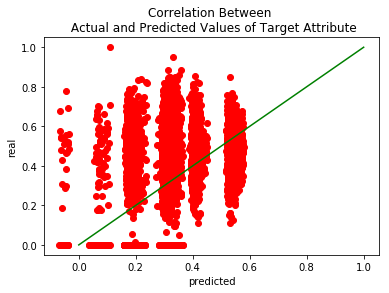

In [78]:
%matplotlib inline
pl.plot(bal_p,bal,'ro')
pl.plot([0,1],[0,1], 'g-')
plt.title('Correlation Between \n Actual and Predicted Values of Target Attribute')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

Compute RMSE using 10-fold cross-validation

In [79]:
kf_bal = KFold(len(bal_x), n_folds=n)
xval_err_bal = 0
for train,test in kf:
    linreg.fit(bal_x[train],bal[train])
    bal_p = linreg.predict(bal_x[test])
    bal_e = bal_p-bal[test]
    xval_err_bal += np.sqrt(np.dot(bal_e,bal_e)/len(bal_x[test]))
       
rmse_10cv_bal = xval_err_bal/n

Compare the cross-validation RMSE to the training RMSE

In [80]:
print('RMSE on training: %.4f' %rmse_train_bal)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv_bal)

RMSE on training: 0.2151
RMSE on 10-fold CV: 0.2152


Feature selection

In [81]:
model = LinearRegression()
rfe = RFE(model, 5)
rfe = rfe.fit(churn_norm_bal, bal)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True False False False  True  True  True  True False False]
[3 2 7 1 4 9 6 1 1 1 1 5 8]


Perform ridge regression

In [82]:
ridge.fit(bal_x,bal)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [83]:
alpha = np.linspace(.0001,20,200)

Determine optimal alpha

Ridge Regression
alpha	 RMSE_train	 RMSE_5cv

0.000	 0.2150		 0.2154
0.101	 0.2150		 0.2154
0.201	 0.2150		 0.2154
0.302	 0.2150		 0.2154
0.402	 0.2150		 0.2154
0.503	 0.2150		 0.2154
0.603	 0.2150		 0.2154
0.704	 0.2150		 0.2154
0.804	 0.2150		 0.2154
0.905	 0.2150		 0.2154
1.005	 0.2150		 0.2154
1.106	 0.2150		 0.2154
1.206	 0.2150		 0.2154
1.307	 0.2150		 0.2154
1.407	 0.2150		 0.2154
1.508	 0.2150		 0.2154
1.608	 0.2150		 0.2154
1.709	 0.2150		 0.2154
1.809	 0.2150		 0.2154
1.910	 0.2150		 0.2154
2.010	 0.2150		 0.2154
2.111	 0.2150		 0.2154
2.211	 0.2150		 0.2154
2.312	 0.2150		 0.2154
2.412	 0.2150		 0.2154
2.513	 0.2150		 0.2154
2.613	 0.2150		 0.2154
2.714	 0.2150		 0.2154
2.814	 0.2150		 0.2154
2.915	 0.2150		 0.2154
3.015	 0.2150		 0.2154
3.116	 0.2150		 0.2154
3.216	 0.2150		 0.2154
3.317	 0.2150		 0.2154
3.417	 0.2150		 0.2154
3.518	 0.2150		 0.2154
3.618	 0.2150		 0.2154
3.719	 0.2150		 0.2154
3.819	 0.2150		 0.2154
3.920	 0.2150		 0.2154
4.020	 0.2150		 0.2154
4.121	 0.21

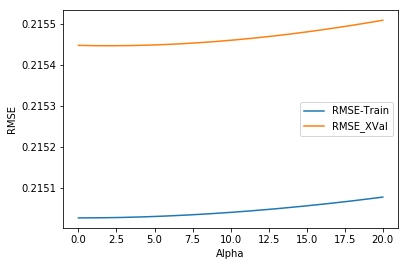

In [84]:
ridgereg(bal_train, bal_target_train, alpha, ridge, 5)

Run optimal alpha on test data with ridge

In [85]:
w_ridge_bal = ridgeRegres(bal_test,bal_target_test,0.101)
print (w_ridge_bal)

[[ 0.04]
 [-0.02]
 [-0.02]
 [-0.4 ]
 [ 0.  ]
 [-0.  ]
 [ 0.02]
 [ 0.02]
 [ 0.07]
 [ 0.29]
 [ 0.07]
 [ 0.21]
 [ 0.22]]


Determine optimal alpha

In [86]:
lasso.fit(bal_x,bal)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso Regression
alpha	 RMSE_train	 RMSE_5cv

0.000	 0.2150		 0.2154
0.101	 0.2486		 0.2486
0.201	 0.2486		 0.2486
0.302	 0.2486		 0.2486
0.402	 0.2486		 0.2486
0.503	 0.2486		 0.2486
0.603	 0.2486		 0.2486
0.704	 0.2486		 0.2486
0.804	 0.2486		 0.2486
0.905	 0.2486		 0.2486
1.005	 0.2486		 0.2486
1.106	 0.2486		 0.2486
1.206	 0.2486		 0.2486
1.307	 0.2486		 0.2486
1.407	 0.2486		 0.2486
1.508	 0.2486		 0.2486
1.608	 0.2486		 0.2486
1.709	 0.2486		 0.2486
1.809	 0.2486		 0.2486
1.910	 0.2486		 0.2486
2.010	 0.2486		 0.2486
2.111	 0.2486		 0.2486
2.211	 0.2486		 0.2486
2.312	 0.2486		 0.2486
2.412	 0.2486		 0.2486
2.513	 0.2486		 0.2486
2.613	 0.2486		 0.2486
2.714	 0.2486		 0.2486
2.814	 0.2486		 0.2486
2.915	 0.2486		 0.2486
3.015	 0.2486		 0.2486
3.116	 0.2486		 0.2486
3.216	 0.2486		 0.2486
3.317	 0.2486		 0.2486
3.417	 0.2486		 0.2486
3.518	 0.2486		 0.2486
3.618	 0.2486		 0.2486
3.719	 0.2486		 0.2486
3.819	 0.2486		 0.2486
3.920	 0.2486		 0.2486
4.020	 0.2486		 0.2486
4.121	 0.24

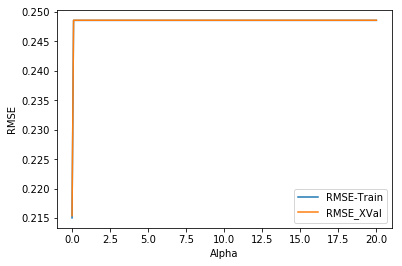

In [87]:
lassoreg(bal_train, bal_target_train, alpha, ridge, 5)

Run optimal alpha on test data with lasso

In [88]:
w_lasso_bal = lassoRegres(bal_test,bal_target_test,0.101)
print (w_lasso_bal)

[[ 0.04]
 [-0.02]
 [-0.02]
 [-0.4 ]
 [ 0.  ]
 [-0.  ]
 [ 0.02]
 [ 0.02]
 [ 0.07]
 [ 0.29]
 [ 0.07]
 [ 0.21]
 [ 0.22]]


Perform SGD on Balance

In [89]:
# Regression using Stochastic Gradient Descent
scaler = StandardScaler()
scaler.fit(bal_train)
x_s_bal = scaler.transform(bal_train)

sgdreg = SGDRegressor(penalty='l2', alpha=0.0001, n_iter=300)

# Compute RMSE on training data
sgdreg.fit(x_s_bal, bal_target_train)
p_bal = sgdreg.predict(x_s_bal)
err_bal = p_bal-bal_target_train
total_error_bal = np.dot(err_bal,err_bal)
rmse_train_bal = np.sqrt(total_error_bal/len(p_bal))

# Compute RMSE using 10-fold x-validation
kf = KFold(len(bal_x), n_folds=10)
xval_err_bal = 0
for train,test in kf:
    scaler = StandardScaler()
    scaler.fit(bal_x[train])  # Don't cheat - fit only on training data
    xtrain_s_bal = scaler.transform(bal_x[train])
    xtest_s_bal = scaler.transform(bal_x[test])  # apply same transformation to test data
    sgdreg.fit(xtrain_s_bal,bal[train])
    p_bal = sgdreg.predict(xtest_s_bal)
    e_bal = p_bal-bal[test]
    xval_err_bal += np.dot(e_bal,e_bal)
rmse_10cv_bal = np.sqrt(xval_err_bal/len(bal_train))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train_bal)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv_bal)

C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\linear

Method: Stochastic Gradient Descent Regression
RMSE on training: 0.2151
RMSE on 10-fold CV: 0.2407


Print RMSE values for all the regression models for comparison

In [90]:
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=0.001)),
        ('ridge', Ridge(fit_intercept=True, alpha=0.99)),
        ('sgd',   SGDRegressor(penalty='l2', alpha=0.0001, n_iter=300))
        ]:
    met.fit(bal_x, bal)
    p_bal = met.predict(bal_x)
    e_bal = p_bal-bal
    total_error_bal = np.dot(e_bal,e_bal)
    rmse_train_bal = np.sqrt(total_error_bal/len(p_bal))

    kf = KFold(len(bal_x), n_folds=10)
    err_bal = 0
    for train,test in kf:
        met.fit(bal_x[train],bal[train])
        p_bal = met.predict(bal_x[test])
        e_bal = p_bal-bal[test]
        err_bal += np.dot(e_bal,e_bal)
    rmse_10cv_bal = np.sqrt(err_bal/len(bal_x))
    
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train_bal)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv_bal)
    print ("\n")

Method: linear regression
RMSE on training: 0.2151
RMSE on 10-fold CV: 0.2152


Method: lasso
RMSE on training: 0.2151
RMSE on 10-fold CV: 0.2152


Method: ridge
RMSE on training: 0.2149
RMSE on 10-fold CV: 0.2152




C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Angelene\Anaconda2\lib\site-packages\sklearn\linear

Method: sgd
RMSE on training: 0.2151
RMSE on 10-fold CV: 0.2152




Ensemble Method

In [91]:
from sklearn.cross_validation import KFold

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print (param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(len(X), K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit([X[k] for k in train], y[train])
            k_train_scores[j] = clf.score([X[k] for k in train], y[train])
            k_test_scores[j] = clf.score([X[k] for k in test], y[test])
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

Perfomance measurement

In [92]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print ("Confussion matrix")
        print (metrics.confusion_matrix(y, y_pred),"\n")

Create duplicate dataset in order to preserve original dataset

In [93]:
churn_dum_exited = churn_dum

Isolate the exited variable from the dataset

In [94]:
exited = churn_dum_exited.Exited
churn_dum_exited.drop('Exited', axis=1, inplace=True)

Create 80-20 split of data train-test

In [95]:
from sklearn.cross_validation import train_test_split
exit_train, exit_test, exit_target_train, exit_target_test = train_test_split(churn_dum_exited,
                                                                              exited, test_size=0.2, random_state=33)

In [96]:
nest = range(5, 101, 5)
print (nest)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(exit_train, exit_target_train)

('n_estimators', ' = ', 5)
('n_estimators', ' = ', 10)
('n_estimators', ' = ', 15)
('n_estimators', ' = ', 20)
('n_estimators', ' = ', 25)
('n_estimators', ' = ', 30)
('n_estimators', ' = ', 35)
('n_estimators', ' = ', 40)
('n_estimators', ' = ', 45)
('n_estimators', ' = ', 50)
('n_estimators', ' = ', 55)
('n_estimators', ' = ', 60)
('n_estimators', ' = ', 65)
('n_estimators', ' = ', 70)
('n_estimators', ' = ', 75)
('n_estimators', ' = ', 80)
('n_estimators', ' = ', 85)
('n_estimators', ' = ', 90)
('n_estimators', ' = ', 95)
('n_estimators', ' = ', 100)


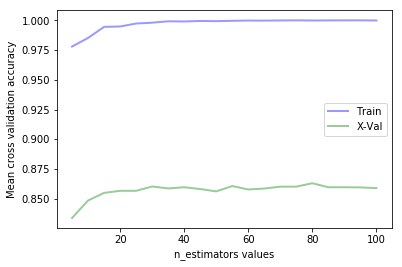

In [98]:
train_scores, test_scores = calc_params(exit_train, exit_target_train, rf, nest, 'n_estimators', 5)

Measure performance of random forest model

In [99]:
measure_performance(exit_test, exit_target_test, rf, show_confussion_matrix=False, show_classification_report=False)

('Accuracy:0.853', '\n')


In [100]:
rf.feature_importances_

array([0.14, 0.25, 0.08, 0.14, 0.13, 0.02, 0.04, 0.14, 0.01, 0.02, 0.01, 0.01, 0.01])

In [101]:
rf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=444415333, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=561768376, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weig

AdaBoost

In [102]:
from sklearn.ensemble import AdaBoostClassifier

In [103]:
ab = AdaBoostClassifier()
ab = ab.fit(exit_train, exit_target_train)

Measure performance of AdaBoost model

In [104]:
measure_performance(exit_test, exit_target_test, ab, show_confussion_matrix=False, show_classification_report=False)

('Accuracy:0.851', '\n')


('n_estimators', ' = ', 5)
('n_estimators', ' = ', 10)
('n_estimators', ' = ', 15)
('n_estimators', ' = ', 20)
('n_estimators', ' = ', 25)
('n_estimators', ' = ', 30)
('n_estimators', ' = ', 35)
('n_estimators', ' = ', 40)
('n_estimators', ' = ', 45)
('n_estimators', ' = ', 50)
('n_estimators', ' = ', 55)
('n_estimators', ' = ', 60)
('n_estimators', ' = ', 65)
('n_estimators', ' = ', 70)
('n_estimators', ' = ', 75)
('n_estimators', ' = ', 80)
('n_estimators', ' = ', 85)
('n_estimators', ' = ', 90)
('n_estimators', ' = ', 95)
('n_estimators', ' = ', 100)


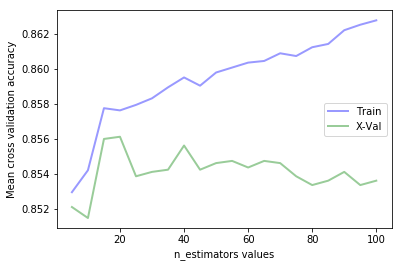

In [105]:
train_scores, test_scores = calc_params(exit_train, exit_target_train, ab, nest, 'n_estimators', 5)

In [106]:
ab.feature_importances_

array([0.15, 0.24, 0.02, 0.25, 0.05, 0.  , 0.02, 0.24, 0.01, 0.01, 0.  , 0.  , 0.01])

In [107]:
ab.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1119752580, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=783243239, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_le

PCA

In [108]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=9)
churn_trans = pca.fit(churn_norm).transform(churn_norm)

In [109]:
print (churn_trans)

[[ 0.79 -0.6   0.05 ...  0.22 -0.13  0.14]
 [ 0.72  0.46  1.04 ...  0.3  -0.25 -0.18]
 [ 0.84 -0.49 -0.62 ... -0.3   0.1  -0.05]
 ...
 [ 0.79 -0.6   0.1  ... -0.07  0.4   0.13]
 [-0.47  0.81 -1.03 ...  0.19 -0.06  0.32]
 [ 0.74 -0.63 -0.29 ...  0.28  0.2  -0.35]]


In [110]:
print(pca.explained_variance_ratio_)

[0.24 0.19 0.13 0.12 0.1  0.07 0.04 0.04 0.03]


9 components explain 96% of the variance

Cluster Analysis using kmeans and bikmeans

In [111]:
from sklearn.cluster import KMeans

In [112]:
def dist_cosim(x, D):
    x_norm = np.linalg.norm(x)
    D_norm = np.linalg.norm(D)
    similarity = np.dot(D,x)/(D_norm * x_norm)
    distances = 1 - similarity
    return distances

In [113]:
#implementation from Chapter-10. Page 209-215
from numpy import *

def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = zeros((k,n), dtype=float)
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k)    
    return centroids 

def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2))
    #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2

        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean
    return centroids, clusterAssment

def biKmeans(dataSet, k, distMeas=distEclud):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroid0 = mean(dataSet, axis=0).tolist()[0]
    centList =[centroid0] #create a list with one centroid
    for j in range(m): #calc initial Error
        clusterAssment[j,1] = distMeas(mat(centroid0), dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A==i)[0],:] #get the data points currently in cluster i
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = sum(splitClustAss[:,1])#compare the SSE to the currrent minimum
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1])
            print("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[nonzero(bestClustAss[:,0] == 1)[0],0] = len(centList) #change 1 to 3,4, or whatever
        bestClustAss[nonzero(bestClustAss[:,0] == 0)[0],0] = bestCentToSplit
        print('the bestCentToSplit is: ',bestCentToSplit)
        print('the len of bestClustAss is: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]#replace a centroid with two best centroids 
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss#reassign new clusters, and SSE
    return mat(centList), clusterAssment

In [114]:
np.set_printoptions(suppress=True, precision=2, linewidth=250)

In [115]:
print (churn_dum_exited)

           CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
RowNumber                                                                  
1                  619   42       2       0.00              1          1   
2                  608   41       1   83807.86              1          0   
3                  502   42       8  159660.80              3          1   
4                  699   39       1       0.00              2          0   
5                  850   43       2  125510.82              1          1   
6                  645   44       8  113755.78              2          1   
7                  822   50       7       0.00              2          1   
8                  376   29       4  115046.74              4          1   
9                  501   44       4  142051.07              2          0   
10                 684   27       2  134603.88              1          1   
11                 528   31       6  102016.72              2          0   
12          

In [116]:
print (exited)

RowNumber
1        1
2        0
3        1
4        0
5        0
6        1
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       1
18       0
19       0
20       0
21       0
22       0
23       1
24       0
25       0
26       0
27       0
28       0
29       0
30       0
        ..
9971     0
9972     0
9973     0
9974     0
9975     0
9976     1
9977     0
9978     0
9979     0
9980     0
9981     0
9982     1
9983     1
9984     0
9985     0
9986     0
9987     0
9988     0
9989     0
9990     0
9991     0
9992     1
9993     0
9994     0
9995     0
9996     0
9997     0
9998     1
9999     1
10000    0
Name: Exited, Length: 10000, dtype: int64


In [117]:
x = np.array(churn_dum_exited)

In [118]:
centroids, clustersAssment = kMeans(x, 10,  distMeas=distEclud, createCent=randCent)

In [119]:
kmeans = KMeans(n_clusters=5, max_iter=500, verbose=1)

In [120]:
kmeans.fit(x)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 12453329673853.77
start iteration
done sorting
end inner loop
Iteration 1, inertia 11715246483114.566
start iteration
done sorting
end inner loop
Iteration 2, inertia 11343738286214.037
start iteration
done sorting
end inner loop
Iteration 3, inertia 11132704315881.078
start iteration
done sorting
end inner loop
Iteration 4, inertia 11015638326555.287
start iteration
done sorting
end inner loop
Iteration 5, inertia 10942724880318.69
start iteration
done sorting
end inner loop
Iteration 6, inertia 10901086745997.898
start iteration
done sorting
end inner loop
Iteration 7, inertia 10875557910452.746
start iteration
done sorting
end inner loop
Iteration 8, inertia 10862087736433.623
start iteration
done sorting
end inner loop
Iteration 9, inertia 10852309873122.959
start iteration
done sorting
end inner loop
Iteration 10, inertia 10847370719475.29
start iteration
done sorting
end inner loop
Iteration 

Iteration 3, inertia 10864663170681.42
start iteration
done sorting
end inner loop
Iteration 4, inertia 10853274366799.416
start iteration
done sorting
end inner loop
Iteration 5, inertia 10847472323366.258
start iteration
done sorting
end inner loop
Iteration 6, inertia 10843967359008.314
start iteration
done sorting
end inner loop
Iteration 7, inertia 10842599235341.91
start iteration
done sorting
end inner loop
Iteration 8, inertia 10842132486748.139
start iteration
done sorting
end inner loop
Iteration 9, inertia 10841800686008.326
start iteration
done sorting
end inner loop
Iteration 10, inertia 10841628062618.78
start iteration
done sorting
end inner loop
Iteration 11, inertia 10841603964099.53
center shift 1.535729e+02 within tolerance 5.538602e+04


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [121]:
clusters = kmeans.predict(x)

In [122]:
print (clusters)

[0 3 3 ... 2 3 1]


In [123]:
print (centroids)

[[   653.01     38.73      4.87  96918.09      1.39      0.68      0.5  176678.32      0.39      0.41      0.19      0.45      0.55]
 [   651.62     39.19      5.1  107108.32      1.4       0.7       0.51 127735.99      0.38      0.41      0.21      0.48      0.52]
 [   648.75     39.54      4.98 126953.68      1.39      0.72      0.5   73140.3       0.4       0.43      0.18      0.42      0.58]
 [   647.73     38.73      5.03 156705.83      1.39      0.69      0.52 112740.51      0.44      0.35      0.21      0.45      0.55]
 [   648.98     38.36      5.08    521.54      1.78      0.71      0.51 149297.35      0.67      0.        0.33      0.47      0.53]
 [   651.8      39.25      4.92 101157.95      1.37      0.7       0.53  24617.92      0.39      0.42      0.19      0.45      0.55]
 [   650.74     39.1       5.03 144276.22      1.42      0.71      0.5  172196.07      0.41      0.4       0.19      0.45      0.55]
 [   652.3      40.23      4.9   81852.64      1.39      0.68      0.

In [124]:
print (kmeans.cluster_centers_)

[[   649.27     38.4       5.08   2178.07      1.77      0.71      0.51 149335.32      0.66      0.02      0.33      0.47      0.53]
 [   652.25     39.24      4.93 122519.45      1.37      0.7       0.53  34614.35      0.4       0.4       0.19      0.45      0.55]
 [   649.53     38.55      5.04   2156.61      1.77      0.73      0.53  49787.71      0.66      0.01      0.33      0.45      0.55]
 [   650.12     39.33      5.   120357.54      1.38      0.7       0.51 101008.28      0.41      0.39      0.2       0.45      0.55]
 [   651.28     39.        5.02 122262.39      1.4       0.69      0.5  167301.84      0.4       0.4       0.2       0.46      0.54]]


In [125]:
from sklearn.metrics import completeness_score, homogeneity_score

print (completeness_score(exited, clusters))

0.004540601497353013


In [126]:
print (homogeneity_score(exited, clusters))

0.014447758952315735


In [127]:
centroids_bk, clusters_bk = biKmeans(x, 10, distMeas=distEclud)

('sseSplit, and notSplit: ', 38362526503322.03, 0.0)
('the bestCentToSplit is: ', 0)
('the len of bestClustAss is: ', 10000)
('sseSplit, and notSplit: ', 3711465128114.9263, 25247130450329.406)
('sseSplit, and notSplit: ', 9980339330130.852, 13115396052992.625)
('the bestCentToSplit is: ', 1)
('the len of bestClustAss is: ', 6200)
('sseSplit, and notSplit: ', 3711465128114.9263, 9980339330130.852)
('sseSplit, and notSplit: ', 3126928121152.119, 17972502424629.574)
('sseSplit, and notSplit: ', 2990967927804.541, 18238629011486.527)
('the bestCentToSplit is: ', 0)
('the len of bestClustAss is: ', 3800)
('sseSplit, and notSplit: ', 651789887648.6157, 11805327229055.844)
('sseSplit, and notSplit: ', 3127243028037.298, 8568571499751.877)
('sseSplit, and notSplit: ', 2990858058604.924, 8834698086608.828)
('sseSplit, and notSplit: ', 612056091890.6067, 11866816559320.791)
('the bestCentToSplit is: ', 1)
('the len of bestClustAss is: ', 3134)
('sseSplit, and notSplit: ', 651789887648.6157, 980

In [128]:
print (centroids_bk)

[[645.88 651.83 651.28 652.23 653.02 652.14 645.47 654.36 645.1  651.92]]


In [129]:
bkC = clusters_bk.T[0]
bkC = bkC.astype(int)

In [130]:
print (bkC)

[[6 4 8 ... 7 2 5]]


In [131]:
bkC = np.ravel(bkC)
print (bkC)

[6 4 8 ... 7 2 5]


In [132]:
print (completeness_score(exited,bkC))

0.0032712875357856636


In [133]:
print (homogeneity_score(exited,bkC))

0.014662424554954092
